In [485]:
# Loading needed packages

import pandas as pd 
import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [486]:
# Reading in the scraped race data
races = pd.read_csv('racesFull.csv') 
# Viewing the first few rows of the created dataframe
races.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0 Act_wt    Class    Date Declar_wt Distance Draw Finish_Time  \
0           0    124  Class 5  9/9/07      1213   1200M    10     1.10.10   
1           1    116  Class 5  9/9/07      1049   1200M    12     1.10.30   
2           2    122  Class 5  9/9/07      1079   1200M     7     1.10.40   
3           3    119  Class 5  9/9/07      1039   1200M    11     1.10.50   
4           4    124  Class 5  9/9/07      1061   1200M     8     1.10.60   

       Handicapper                 Horse  Horse_Number     Jockey  \
0  JORDAN HANDICAP      SILLY BOY(CC094)           3.0  K T Yeung   
1  JORDAN HANDICAP      DRAGON INN(E327)           9.0  M W Leung   
2  JORDAN HANDICAP  WITHALLMYHEART(E268)           7.0     P H Lo   
3  JORDAN HANDICAP     MUTUAL GAIN(E275)          10.0    M Nunes   
4  JORDAN HANDICAP       SPICY HOT(H064)           4.0   C K Tong   

  Lengs_Behind Odds Place Prize_Money        Race Section_Time    Track  \
0            -   10     1        HK$   RACE 1 (1)    [0, 0, 0]  Sha Tin   
1       1/3/04  5.3     2        HK$   RACE 1 (1)    [0, 0, 0]  Sha Tin   
2       1/3/04  5.6     3        HK$   RACE 1 (1)    [0, 0, 0]  Sha Tin   
3            3   21     4        HK$   RACE 1 (1)    [0, 0, 0]  Sha Tin   
4       3/1/04  9.4     5        HK$   RACE 1 (1)    [0, 0, 0]  Sha Tin   

   Track_Status      Trainer Winning_Splits  
0  GOOD TO FIRM  A T Millard      [0, 0, 0]  
1  GOOD TO FIRM     Y S Tsui      [0, 0, 0]  
2  GOOD TO FIRM       T K Ng      [0, 0, 0]  
3  GOOD TO FIRM    T W Leung      [0, 0, 0]  
4  GOOD TO FIRM     C Fownes      [0, 0, 0]

In [487]:
# Viewing the shape of the dataframe to get an idea of the how many rows and columns there are
print(races.shape)
# Obtaining descriptive stats for the columns
races.describe()

(101511, 22)


Unnamed: 0   Horse_Number
count  101511.000000  100437.000000
mean        5.919309       6.888238
std         3.813511       3.755443
min         0.000000       1.000000
25%         3.000000       4.000000
50%         6.000000       7.000000
75%         9.000000      10.000000
max        15.000000      14.000000

In [488]:
# Finding all the unique horses contained in the dataset to then scrape their biographical data
# from other urls for future use

fullHorses = set(races['Horse'])
horseIdList = []
horseNameList = []
for h in races['Horse']:
    fullHorse = h.split('(')
    horseName = fullHorse[0]
    horseNameList.append(horseName)
    horseId = fullHorse[1]
    horseId = horseId.replace(')', '')
    horseIdList.append(horseId)
horsesDF = pd.DataFrame({'Horse_Name':horseNameList, 'HorseId':horseIdList})
horsesDF
horsesDF.to_csv('horseIds.csv')

In [489]:
# Removing unnamed column from the dataframe
races.drop(columns='Unnamed: 0', inplace=True)

# Dropping columns that either contain data not relevent to making preditions or have too many missing values
races.drop(columns=['Prize_Money','Section_Time', 'Winning_Splits', 'Handicapper', 'Horse_Number', 'Lengs_Behind'], inplace=True)

In [490]:
# Viewing the shape of the dataframe to get an idea of the how many rows and columns there are
print(races.shape)
# Obtaining descriptive stats for the columns
races.describe()

(101511, 15)


Act_wt    Class        Date Declar_wt Distance    Draw Finish_Time  \
count   101511   101357      101511    101511   101511  101511      101506   
unique      63       22         893       452       16      16        5676   
top        126  Class 4  26/10/2014      1084   1200M        2         ---   
freq      4449    36654         300       723    30951    7964        2232   

                 Horse   Jockey    Odds   Place        Race    Track  \
count           101511   101485  101487  101509      101511   101511   
unique            5465      217     194      36        4874        2   
top     VIVA GUY(K318)  D Whyte      99       1  RACE 5 (5)  Sha Tin   
freq                90     5792    9026    8154         153    67561   

       Track_Status   Trainer  
count        101511    101511  
unique           10       193  
top            GOOD  A S Cruz  
freq          64150      6036

In [491]:
# Looking to find rows with missing values
print(races.loc[races.isnull().any(axis=1)])

# Only 206 rows contain missing data out of 101511 do these can be dropped
races.dropna(inplace=True)
# Resetting the indexes since rows have been removed
races.reset_index(drop=True, inplace=True)

# Viewing the shape of the dataframe to get an idea of the how many rows and columns there are
print(races.shape)
# Obtaining descriptive stats for the columns
races.describe()

      Act_wt    Class        Date Declar_wt Distance Draw Finish_Time  \
587      119      NaN     1/10/07      1161   1000M     9     0.55.90   
588      113      NaN     1/10/07      1181   1000M     5     0.56.10   
589      120      NaN     1/10/07      1129   1000M     7     0.56.10   
590      119      NaN     1/10/07      1088   1000M     6     0.56.20   
591      117      NaN     1/10/07      1210   1000M     2     0.56.30   
592      133      NaN     1/10/07      1197   1000M     8     0.56.40   
593      122      NaN     1/10/07      1107   1000M     1     0.56.40   
594      111      NaN     1/10/07      1185   1000M    14     0.56.60   
595      106      NaN     1/10/07      1217   1000M    10     0.56.80   
596      108      NaN     1/10/07      1068   1000M    11     0.56.90   
597      127      NaN     1/10/07      1132   1000M    12     0.57.10   
598      111      NaN     1/10/07      1144   1000M     3     0.57.60   
599      113      NaN     1/10/07      1129   1000M

Act_wt    Class        Date Declar_wt Distance    Draw Finish_Time  \
count   101305   101305      101305    101305   101305  101305      101305   
unique      62       22         893       452       16      16        5667   
top        126  Class 4  26/10/2014      1084   1200M        1         ---   
freq      4447    36640         300       721    30904    7949        2201   

                 Horse   Jockey    Odds   Place        Race    Track  \
count           101305   101305  101305  101305      101305   101305   
unique            5458      216     194      36        4869        2   
top     VIVA GUY(K318)  D Whyte      99       1  RACE 5 (5)  Sha Tin   
freq                90     5783    9014    8142         153    67373   

       Track_Status   Trainer  
count        101305    101305  
unique           10       192  
top            GOOD  A S Cruz  
freq          64081      6013

In [492]:
# All of the columns are currenly as strings so many of them need to be converted into numerical values

def convertLtoInt(vec):
    convertList = []
    for item in vec:
        try:            
            item = int(item)
        except:
            item = float('NaN')
        convertList.append(item)
    return(convertList)

def convertLtoFloat(vec):
    convertList = []
    for item in vec:
        try:            
            item = round(float(item),2)
        except:
            item = float('NaN')
        convertList.append(item)
    return(convertList)

races['Act_wt'] = convertLtoInt(races['Act_wt'])
races['Draw'] = convertLtoInt(races['Draw'])
races['Place'] = convertLtoInt(races['Place'])
races['Declar_wt'] = convertLtoInt(races['Declar_wt'])
races['Odds'] = convertLtoFloat(races['Odds'])

# Looking to find rows with missing values
races.loc[races.isnull().any(axis=1)]

Act_wt    Class        Date  Declar_wt Distance  Draw Finish_Time  \
13         119  Class 5      9/9/07     1070.0   1200M    4.0         ---   
90         113  Class 2      9/9/07     1171.0   1000M    NaN         ---   
140        126  Class 5  15/09/2007     1123.0   1600M    NaN         ---   
176        122  Class 4  15/09/2007     1181.0   1000M    NaN         ---   
202        121  Class 3  15/09/2007     1148.0   1400M    NaN         ---   
212        126  Class 4  15/09/2007     1001.0   1200M    NaN         ---   
239        120  Class 2  15/09/2007     1045.0   1600M    NaN         ---   
327        126  Class 4  23/09/2007     1125.0   1800M    NaN         ---   
338        123  Class 3  23/09/2007        NaN   1600M    NaN         ---   
401        128  Class 5  26/09/2007     1119.0   1200M    7.0         ---   
638        120  Class 4     7/10/07     1154.0   1200M    NaN         ---   
669        117  Class 4     7/10/07     1045.0   1400M   12.0     1.23.00   
670        111  Class 4     7/10/07     1113.0   1400M   14.0     1.23.00   
706        132  Class 3     7/10/07        NaN   1200M    NaN         ---   
707        117  Class 3     7/10/07     1095.0   1200M    NaN         ---   
805        119  Class 5  14/10/2007     1096.0   1400M    NaN         ---   
887        128  Class 2  14/10/2007     1069.0   1600M    NaN         ---   
899        126  Class 4  21/10/2007     1120.0   1650M    6.0     1.42.20   
900        124  Class 4  21/10/2007     1160.0   1650M    8.0     1.42.20   
930        129  Class 4  21/10/2007     1110.0   1200M    NaN         ---   
973        119  Class 3  21/10/2007     1180.0   1400M    NaN         ---   
1014       132  Class 4     3/11/07        NaN   1200M    NaN         ---   
1033       123  Class 3     3/11/07     1124.0   1600M    7.0     1.35.90   
1034       115  Class 3     3/11/07     1154.0   1600M    8.0     1.35.90   
1167       129  Class 2    11/11/07     1262.0   2000M    NaN         ---   
...        ...      ...         ...        ...      ...   ...         ...   
100548     131  Class 4  25/04/2018     1100.0   1650M    NaN         ---   
100572     130  Class 5      9/5/18     1144.0   1200M    NaN         ---   
100597     121  Class 4      9/5/18     1181.0   1800M    NaN         ---   
100622     119  Class 3      9/5/18     1066.0   1200M    NaN         ---   
100753     122  Class 3  16/05/2018     1201.0   1650M    NaN         ---   
100788     133  Class 4  23/05/2018     1130.0   1000M    NaN         ---   
100789     131  Class 4  23/05/2018     1069.0   1000M    NaN         ---   
100802     128  Class 4  23/05/2018     1119.0   1650M    NaN         ---   
100847     125  Class 3  23/05/2018     1153.0   1200M    NaN         ---   
100866     123  Class 3      6/6/18     1062.0   2200M    NaN         ---   
100890     110  Class 4      6/6/18     1069.0   1000M    NaN         ---   
100903     133  Class 4      6/6/18     1081.0   1650M    NaN         ---   
100916     133  Class 4      6/6/18     1042.0   1200M    NaN         ---   
100965     123  Class 4  13/06/2018     1040.0   1650M    NaN         ---   
101026     130  Class 2  13/06/2018     1102.0   1200M    NaN         ---   
101108     130  Class 3  27/06/2018     1147.0   1650M    NaN         ---   
101157     131  Class 4      4/7/18     1088.0   1200M    NaN         ---   
101168     124  Class 4      4/7/18     1017.0   1800M    NaN         ---   
101169     119  Class 4      4/7/18     1253.0   1800M    NaN         ---   
101182     129  Class 3      4/7/18     1070.0   1200M    NaN         ---   
101194     118  Class 3      4/7/18     1051.0   1650M    NaN         ---   
101254     126  Class 4     11/7/18     1142.0   1650M    NaN         ---   
101278     122  Class 3     11/7/18     1138.0   1000M    NaN         ---   
101291     121  Class 2     11/7/18     1098.0   1200M    NaN         ---   
101304     133  Class 3     11/7/18     1092.0   1200M    NaN         ---   

   

In [493]:
# With 2679 rows contain missing data out of 101305 do these can be dropped
races.dropna(inplace=True)
# Resetting the indexes since rows have been removed
races.reset_index(drop=True, inplace=True)

# Viewing the shape of the dataframe to get an idea of the how many rows and columns there are
print(races.shape)
# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

(98626, 15)
             Act_wt     Declar_wt          Draw          Odds         Place
count  98626.000000  98626.000000  98626.000000  98626.000000  98626.000000
mean     122.650305   1106.521191      6.855322     28.374463      6.782461
std        6.306790     62.659071      3.744500     29.794421      3.730334
min      103.000000    693.000000      1.000000      1.000000      1.000000
25%      118.000000   1063.000000      4.000000      7.600000      4.000000
50%      123.000000   1103.000000      7.000000     15.000000      7.000000
75%      128.000000   1148.000000     10.000000     37.000000     10.000000
max      133.000000   1365.000000     15.000000     99.000000     14.000000


Act_wt    Class     Date  Declar_wt Distance  Draw Finish_Time  \
0         124  Class 5   9/9/07     1213.0   1200M   10.0     1.10.10   
1         116  Class 5   9/9/07     1049.0   1200M   12.0     1.10.30   
2         122  Class 5   9/9/07     1079.0   1200M    7.0     1.10.40   
3         119  Class 5   9/9/07     1039.0   1200M   11.0     1.10.50   
4         124  Class 5   9/9/07     1061.0   1200M    8.0     1.10.60   
5         114  Class 5   9/9/07     1207.0   1200M    6.0     1.10.80   
6         114  Class 5   9/9/07     1042.0   1200M    1.0     1.10.80   
7         130  Class 5   9/9/07     1084.0   1200M    3.0     1.10.90   
8         130  Class 5   9/9/07     1244.0   1200M   13.0     1.10.90   
9         118  Class 5   9/9/07     1101.0   1200M    5.0     1.10.90   
10        133  Class 5   9/9/07     1142.0   1200M    2.0     1.11.10   
11        132  Class 5   9/9/07     1028.0   1200M    9.0     1.11.30   
12        121  Class 5   9/9/07      992.0   1200M   14.0     1.11.90   
13        121  Class 5   9/9/07     1084.0   1400M    3.0     1.23.00   
14        124  Class 5   9/9/07      991.0   1400M    5.0     1.23.20   
15        119  Class 5   9/9/07     1100.0   1400M    6.0     1.23.60   
16        129  Class 5   9/9/07     1091.0   1400M    2.0     1.23.60   
17        131  Class 5   9/9/07     1030.0   1400M   12.0     1.23.60   
18        116  Class 5   9/9/07     1106.0   1400M    9.0     1.23.60   
19        128  Class 5   9/9/07      992.0   1400M    1.0     1.23.70   
20        117  Class 5   9/9/07     1020.0   1400M   10.0     1.23.70   
21        121  Class 5   9/9/07     1108.0   1400M    4.0     1.23.80   
22        120  Class 5   9/9/07     1032.0   1400M    8.0     1.23.90   
23        114  Class 5   9/9/07     1099.0   1400M    7.0     1.23.90   
24        131  Class 5   9/9/07     1102.0   1400M   11.0     1.24.00   
...       ...      ...      ...        ...      ...   ...         ...   
98601     128  Class 3  11/7/18     1031.0   1000M    9.0     1.00.82   
98602     117  Class 2  11/7/18     1049.0   1200M    2.0     1.09.00   
98603     119  Class 2  11/7/18      973.0   1200M    3.0     1.09.15   
98604     114  Class 2  11/7/18     1159.0   1200M    7.0     1.09.37   
98605     121  Class 2  11/7/18     1007.0   1200M    5.0     1.09.46   
98606     125  Class 2  11/7/18     1195.0   1200M    8.0     1.09.47   
98607     129  Class 2  11/7/18     1050.0   1200M    1.0     1.09.69   
98608     115  Class 2  11/7/18     1024.0   1200M    4.0     1.09.76   
98609     110  Class 2  11/7/18     1261.0   1200M    9.0     1.09.76   
98610     133  Class 2  11/7/18     1181.0   1200M   12.0     1.09.87   
98611     115  Class 2  11/7/18     1040.0   1200M    6.0     1.09.90   
98612     109  Class 2  11/7/18     1032.0   1200M   11.0     1.10.14   
98613     118  Class 2  11/7/18     1036.0   1200M   10.0     1.10.14   
98614     113  Class 3  11/7/18     1014.0   1200M    2.0     1.09.83   
98615     127  Class 3  11/7/18     1224.0   1200M    3.0     1.09.85   
98616     116  Class 3  11/7/18     1110.0   1200M    9.0     1.10.15   
98617     125  Class 3  11/7/18     1132.0   1200M   10.0     1.10.24   
98618     126  Class 3  11/7/18     1123.0   1200M   12.0     1.10.31   
98619     123  Class 3  11/7/18     1098.0   1200M    5.0     1.10.34   
98620     131  Class 3  11/7/18     1090.0   1200M    4.0     1.10.45   
98621     125  Class 3  11/7/18     1082.0   1200M    7.0     1.10.68   
98622     122  Class 3  11/7/18     1035.0   1200M    8.0     1.10.71   
98623     129  Class 3  11/7/18     1078.0   1200M    1.0     1.10.72   
98624     122  Class 3  11/7/18     1085.0   1200M   11.0     1.12.83   
98625     126  Class 3  11/7/18     1116.0   1200M    6.0     1.14.36   

                          Horse       Jockey  Odds  Place          Race  \
0              SILLY BOY(CC094)    K T Yeung  10.0    1.0    RACE 1 (1)   
1              DRAGON INN(E327)    M W Leung   5.3    2.0   

In [494]:
# Converting distance column to integers

# Creating a list of all the distances for each row
cDist = races['Distance']
# Removing the M from each string in the list since that is just providing that meters is the distance of measure
cDist = [s.replace('M', '') for s in cDist]
# Removing any whitespace contained in the string
cDist = [s.strip() for s in cDist]
# Converting every entry into intergers
cDist = list(map(int, cDist))
# Replacing the string distances values in the dataframe with the corrisponding integer values
races['Distance'] = cDist
# Deleting the created list for memory purposes
del cDist
# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe
races

             Act_wt     Declar_wt      Distance          Draw          Odds  \
count  98626.000000  98626.000000  98626.000000  98626.000000  98626.000000   
mean     122.650305   1106.521191   1419.598280      6.855322     28.374463   
std        6.306790     62.659071    277.388939      3.744500     29.794421   
min      103.000000    693.000000   1000.000000      1.000000      1.000000   
25%      118.000000   1063.000000   1200.000000      4.000000      7.600000   
50%      123.000000   1103.000000   1400.000000      7.000000     15.000000   
75%      128.000000   1148.000000   1650.000000     10.000000     37.000000   
max      133.000000   1365.000000   2400.000000     15.000000     99.000000   

              Place  
count  98626.000000  
mean       6.782461  
std        3.730334  
min        1.000000  
25%        4.000000  
50%        7.000000  
75%       10.000000  
max       14.000000  


Act_wt    Class     Date  Declar_wt  Distance  Draw Finish_Time  \
0         124  Class 5   9/9/07     1213.0      1200  10.0     1.10.10   
1         116  Class 5   9/9/07     1049.0      1200  12.0     1.10.30   
2         122  Class 5   9/9/07     1079.0      1200   7.0     1.10.40   
3         119  Class 5   9/9/07     1039.0      1200  11.0     1.10.50   
4         124  Class 5   9/9/07     1061.0      1200   8.0     1.10.60   
5         114  Class 5   9/9/07     1207.0      1200   6.0     1.10.80   
6         114  Class 5   9/9/07     1042.0      1200   1.0     1.10.80   
7         130  Class 5   9/9/07     1084.0      1200   3.0     1.10.90   
8         130  Class 5   9/9/07     1244.0      1200  13.0     1.10.90   
9         118  Class 5   9/9/07     1101.0      1200   5.0     1.10.90   
10        133  Class 5   9/9/07     1142.0      1200   2.0     1.11.10   
11        132  Class 5   9/9/07     1028.0      1200   9.0     1.11.30   
12        121  Class 5   9/9/07      992.0      1200  14.0     1.11.90   
13        121  Class 5   9/9/07     1084.0      1400   3.0     1.23.00   
14        124  Class 5   9/9/07      991.0      1400   5.0     1.23.20   
15        119  Class 5   9/9/07     1100.0      1400   6.0     1.23.60   
16        129  Class 5   9/9/07     1091.0      1400   2.0     1.23.60   
17        131  Class 5   9/9/07     1030.0      1400  12.0     1.23.60   
18        116  Class 5   9/9/07     1106.0      1400   9.0     1.23.60   
19        128  Class 5   9/9/07      992.0      1400   1.0     1.23.70   
20        117  Class 5   9/9/07     1020.0      1400  10.0     1.23.70   
21        121  Class 5   9/9/07     1108.0      1400   4.0     1.23.80   
22        120  Class 5   9/9/07     1032.0      1400   8.0     1.23.90   
23        114  Class 5   9/9/07     1099.0      1400   7.0     1.23.90   
24        131  Class 5   9/9/07     1102.0      1400  11.0     1.24.00   
...       ...      ...      ...        ...       ...   ...         ...   
98601     128  Class 3  11/7/18     1031.0      1000   9.0     1.00.82   
98602     117  Class 2  11/7/18     1049.0      1200   2.0     1.09.00   
98603     119  Class 2  11/7/18      973.0      1200   3.0     1.09.15   
98604     114  Class 2  11/7/18     1159.0      1200   7.0     1.09.37   
98605     121  Class 2  11/7/18     1007.0      1200   5.0     1.09.46   
98606     125  Class 2  11/7/18     1195.0      1200   8.0     1.09.47   
98607     129  Class 2  11/7/18     1050.0      1200   1.0     1.09.69   
98608     115  Class 2  11/7/18     1024.0      1200   4.0     1.09.76   
98609     110  Class 2  11/7/18     1261.0      1200   9.0     1.09.76   
98610     133  Class 2  11/7/18     1181.0      1200  12.0     1.09.87   
98611     115  Class 2  11/7/18     1040.0      1200   6.0     1.09.90   
98612     109  Class 2  11/7/18     1032.0      1200  11.0     1.10.14   
98613     118  Class 2  11/7/18     1036.0      1200  10.0     1.10.14   
98614     113  Class 3  11/7/18     1014.0      1200   2.0     1.09.83   
98615     127  Class 3  11/7/18     1224.0      1200   3.0     1.09.85   
98616     116  Class 3  11/7/18     1110.0      1200   9.0     1.10.15   
98617     125  Class 3  11/7/18     1132.0      1200  10.0     1.10.24   
98618     126  Class 3  11/7/18     1123.0      1200  12.0     1.10.31   
98619     123  Class 3  11/7/18     1098.0      1200   5.0     1.10.34   
98620     131  Class 3  11/7/18     1090.0      1200   4.0     1.10.45   
98621     125  Class 3  11/7/18     1082.0      1200   7.0     1.10.68   
98622     122  Class 3  11/7/18     1035.0      1200   8.0     1.10.71   
98623     129  Class 3  11/7/18     1078.0      1200   1.0     1.10.72   
98624     122  Class 3  11/7/18     1085.0      1200  11.0     1.12.83   
98625     126  Class 3  11/7/18     1116.0      1200   6.0     1.14.36   

                          Horse       Jockey  Odds  Place          Race  \
0              SILLY BOY(CC094)    K T Yeung  10.0    1.0    RACE 1 (1)   
1       

In [495]:
# Converting the string formatted dates into datetime dates

# Creating a list to store the corrected dtaes
correctedDates = []
# Looping over each date
for date in races['Date']:
    # Splitting the date into seperate peices when a / is encountered
    splitList = date.split('/')
    # Finding the day, month, and year from the split string
    day = int(splitList[0])
    month = int(splitList[1])
    if int(splitList[2]) < 1999:
        year = int(splitList[2]) + 2000
    else:
        year = int(splitList[2])
    # Converting to a date
    date = datetime.date(year,month,day)
    # Appending the date to the list
    correctedDates.append(date)
# Replacing the columns of strings with dates in the dataframe
races['Date'] = correctedDates
# Deleting the correctDates list for memory purposes
del correctedDates

# Viewing updated descriptive stats
print(races.describe())
# Viewing dataframe
races

             Act_wt     Declar_wt      Distance          Draw          Odds  \
count  98626.000000  98626.000000  98626.000000  98626.000000  98626.000000   
mean     122.650305   1106.521191   1419.598280      6.855322     28.374463   
std        6.306790     62.659071    277.388939      3.744500     29.794421   
min      103.000000    693.000000   1000.000000      1.000000      1.000000   
25%      118.000000   1063.000000   1200.000000      4.000000      7.600000   
50%      123.000000   1103.000000   1400.000000      7.000000     15.000000   
75%      128.000000   1148.000000   1650.000000     10.000000     37.000000   
max      133.000000   1365.000000   2400.000000     15.000000     99.000000   

              Place  
count  98626.000000  
mean       6.782461  
std        3.730334  
min        1.000000  
25%        4.000000  
50%        7.000000  
75%       10.000000  
max       14.000000  


Act_wt    Class        Date  Declar_wt  Distance  Draw Finish_Time  \
0         124  Class 5  2007-09-09     1213.0      1200  10.0     1.10.10   
1         116  Class 5  2007-09-09     1049.0      1200  12.0     1.10.30   
2         122  Class 5  2007-09-09     1079.0      1200   7.0     1.10.40   
3         119  Class 5  2007-09-09     1039.0      1200  11.0     1.10.50   
4         124  Class 5  2007-09-09     1061.0      1200   8.0     1.10.60   
5         114  Class 5  2007-09-09     1207.0      1200   6.0     1.10.80   
6         114  Class 5  2007-09-09     1042.0      1200   1.0     1.10.80   
7         130  Class 5  2007-09-09     1084.0      1200   3.0     1.10.90   
8         130  Class 5  2007-09-09     1244.0      1200  13.0     1.10.90   
9         118  Class 5  2007-09-09     1101.0      1200   5.0     1.10.90   
10        133  Class 5  2007-09-09     1142.0      1200   2.0     1.11.10   
11        132  Class 5  2007-09-09     1028.0      1200   9.0     1.11.30   
12        121  Class 5  2007-09-09      992.0      1200  14.0     1.11.90   
13        121  Class 5  2007-09-09     1084.0      1400   3.0     1.23.00   
14        124  Class 5  2007-09-09      991.0      1400   5.0     1.23.20   
15        119  Class 5  2007-09-09     1100.0      1400   6.0     1.23.60   
16        129  Class 5  2007-09-09     1091.0      1400   2.0     1.23.60   
17        131  Class 5  2007-09-09     1030.0      1400  12.0     1.23.60   
18        116  Class 5  2007-09-09     1106.0      1400   9.0     1.23.60   
19        128  Class 5  2007-09-09      992.0      1400   1.0     1.23.70   
20        117  Class 5  2007-09-09     1020.0      1400  10.0     1.23.70   
21        121  Class 5  2007-09-09     1108.0      1400   4.0     1.23.80   
22        120  Class 5  2007-09-09     1032.0      1400   8.0     1.23.90   
23        114  Class 5  2007-09-09     1099.0      1400   7.0     1.23.90   
24        131  Class 5  2007-09-09     1102.0      1400  11.0     1.24.00   
...       ...      ...         ...        ...       ...   ...         ...   
98601     128  Class 3  2018-07-11     1031.0      1000   9.0     1.00.82   
98602     117  Class 2  2018-07-11     1049.0      1200   2.0     1.09.00   
98603     119  Class 2  2018-07-11      973.0      1200   3.0     1.09.15   
98604     114  Class 2  2018-07-11     1159.0      1200   7.0     1.09.37   
98605     121  Class 2  2018-07-11     1007.0      1200   5.0     1.09.46   
98606     125  Class 2  2018-07-11     1195.0      1200   8.0     1.09.47   
98607     129  Class 2  2018-07-11     1050.0      1200   1.0     1.09.69   
98608     115  Class 2  2018-07-11     1024.0      1200   4.0     1.09.76   
98609     110  Class 2  2018-07-11     1261.0      1200   9.0     1.09.76   
98610     133  Class 2  2018-07-11     1181.0      1200  12.0     1.09.87   
98611     115  Class 2  2018-07-11     1040.0      1200   6.0     1.09.90   
98612     109  Class 2  2018-07-11     1032.0      1200  11.0     1.10.14   
98613     118  Class 2  2018-07-11     1036.0      1200  10.0     1.10.14   
98614     113  Class 3  2018-07-11     1014.0      1200   2.0     1.09.83   
98615     127  Class 3  2018-07-11     1224.0      1200   3.0     1.09.85   
98616     116  Class 3  2018-07-11     1110.0      1200   9.0     1.10.15   
98617     125  Class 3  2018-07-11     1132.0      1200  10.0     1.10.24   
98618     126  Class 3  2018-07-11     1123.0      1200  12.0     1.10.31   
98619     123  Class 3  2018-07-11     1098.0      1200   5.0     1.10.34   
98620     131  Class 3  2018-07-11     1090.0      1200   4.0     1.10.45   
98621     125  Class 3  2018-07-11     1082.0      1200   7.0     1.10.68   
98622     122  Class 3  2018-07-11     1035.0      1200   8.0     1.10.71   
98623     129  Class 3  2018-07-11     1078.0      1200   1.0     1.10.72   
98624     122  Class 3  2018-07-11     1085.0      1200  11.0     1.12.83   
98625     126  Class 3  2018-07-11     1116.0      1200   6.0     1.14.36   

  

In [496]:
# Taking only the race number for the day out of the string

# Creating an empty list to store the interger value of the race
raceList = []
# Looping over each race
for x in races['Race']:
    # Testing the length of the race string to see if it is a single or double digit
    if len(x) == 10:
        # If the string length is 10 then it is a single digit and the slice of the string containing that digit is
        # appended to the list
        raceList.append(x[5:6])
    else:
        # Double digit race number found in the string slice and appended to the list
        raceList.append(x[5:7])

# Replacing the string value for the race with the updated race list
races['Race'] = raceList
# Replacing the updated race list with integer values
races['Race'] = races['Race'].astype(int)
# Deleting the raceList for memory purposes
del raceList

# Sorting the dataframe by dates and place then reindexing
races = races.sort_values(by=['Date','Race'])
races = races.reset_index(drop=True)

# Viewing updated descriptive stats
print(races.describe())
# Viewing dataframe
races.head(10)

             Act_wt     Declar_wt      Distance          Draw          Odds  \
count  98626.000000  98626.000000  98626.000000  98626.000000  98626.000000   
mean     122.650305   1106.521191   1419.598280      6.855322     28.374463   
std        6.306790     62.659071    277.388939      3.744500     29.794421   
min      103.000000    693.000000   1000.000000      1.000000      1.000000   
25%      118.000000   1063.000000   1200.000000      4.000000      7.600000   
50%      123.000000   1103.000000   1400.000000      7.000000     15.000000   
75%      128.000000   1148.000000   1650.000000     10.000000     37.000000   
max      133.000000   1365.000000   2400.000000     15.000000     99.000000   

              Place          Race  
count  98626.000000  98626.000000  
mean       6.782461      5.235607  
std        3.730334      2.826035  
min        1.000000      1.000000  
25%        4.000000      3.000000  
50%        7.000000      5.000000  
75%       10.000000      8.000000  


Act_wt    Class        Date  Declar_wt  Distance  Draw Finish_Time  \
0     124  Class 5  2007-09-09     1213.0      1200  10.0     1.10.10   
1     116  Class 5  2007-09-09     1049.0      1200  12.0     1.10.30   
2     122  Class 5  2007-09-09     1079.0      1200   7.0     1.10.40   
3     119  Class 5  2007-09-09     1039.0      1200  11.0     1.10.50   
4     124  Class 5  2007-09-09     1061.0      1200   8.0     1.10.60   
5     114  Class 5  2007-09-09     1207.0      1200   6.0     1.10.80   
6     114  Class 5  2007-09-09     1042.0      1200   1.0     1.10.80   
7     130  Class 5  2007-09-09     1084.0      1200   3.0     1.10.90   
8     130  Class 5  2007-09-09     1244.0      1200  13.0     1.10.90   
9     118  Class 5  2007-09-09     1101.0      1200   5.0     1.10.90   

                      Horse     Jockey  Odds  Place  Race    Track  \
0          SILLY BOY(CC094)  K T Yeung  10.0    1.0     1  Sha Tin   
1          DRAGON INN(E327)  M W Leung   5.3    2.0     1  Sha Tin   
2      WITHALLMYHEART(E268)     P H Lo   5.6    3.0     1  Sha Tin   
3         MUTUAL GAIN(E275)    M Nunes  21.0    4.0     1  Sha Tin   
4           SPICY HOT(H064)   C K Tong   9.4    5.0     1  Sha Tin   
5          KING PALM(CC118)  Y T Cheng  26.0    6.0     1  Sha Tin   
6  FISHKING EXCELLENT(G232)    W M Lai  37.0    7.0     1  Sha Tin   
7          GEM MASTER(G235)     G Boss  20.0    8.0     1  Sha Tin   
8       FASTER FASTER(G010)    D Whyte  10.0    9.0     1  Sha Tin   
9           AMBITION(CC079)      S Dye   6.6   10.0     1  Sha Tin   

   Track_Status       Trainer  
0  GOOD TO FIRM   A T Millard  
1  GOOD TO FIRM      Y S Tsui  
2  GOOD TO FIRM        T K Ng  
3  GOOD TO FIRM     T W Leung  
4  GOOD TO FIRM      C Fownes  
5  GOOD TO FIRM      Y O Wong  
6  GOOD TO FIRM  P O'Sullivan  
7  GOOD TO FIRM      C S Shum  
8  GOOD TO FIRM  D E Ferraris  
9  GOOD TO FIRM       K W Lui

In [497]:
# Creating unique ids for each race

# Starting the raceID at 0
raceID = 0
# Creating a list of race ids
raceIdList = []
# Selecting the first date contained in the dataset
testDate = races['Date'][0]
# Selecting the first race number contained in the dataset
testRace = races['Race'][0]
# Looping over the entire dataset row by row
for index, horse in races.iterrows():
    # Testing if the test date matches the date contained in the row and if the test race number is the same as well
    if testDate == horse['Date'] and testRace == horse['Race']:
        # Appending the raceId value
        raceIdList.append(raceID)
    else:
        # Increasing the raceID by 1
        raceID += 1
        # Assigning new test dates and races based on current row values
        testDate = horse['Date']
        testRace = horse['Race']
        # Appending raceID
        raceIdList.append(raceID)
# Creating a new column in the dataframe for raceIDs
races['RaceId'] = raceIdList
# Deleting all lists and variables for memory purposes
del raceID
del raceIdList
del testDate
del testRace

# Viewing updated descriptive stats
print(races.describe())
# Viewing dataframe
races.head(10)

             Act_wt     Declar_wt      Distance          Draw          Odds  \
count  98626.000000  98626.000000  98626.000000  98626.000000  98626.000000   
mean     122.650305   1106.521191   1419.598280      6.855322     28.374463   
std        6.306790     62.659071    277.388939      3.744500     29.794421   
min      103.000000    693.000000   1000.000000      1.000000      1.000000   
25%      118.000000   1063.000000   1200.000000      4.000000      7.600000   
50%      123.000000   1103.000000   1400.000000      7.000000     15.000000   
75%      128.000000   1148.000000   1650.000000     10.000000     37.000000   
max      133.000000   1365.000000   2400.000000     15.000000     99.000000   

              Place          Race        RaceId  
count  98626.000000  98626.000000  98626.000000  
mean       6.782461      5.235607   4045.055969  
std        3.730334      2.826035   2339.346086  
min        1.000000      1.000000      0.000000  
25%        4.000000      3.000000   20

Act_wt    Class        Date  Declar_wt  Distance  Draw Finish_Time  \
0     124  Class 5  2007-09-09     1213.0      1200  10.0     1.10.10   
1     116  Class 5  2007-09-09     1049.0      1200  12.0     1.10.30   
2     122  Class 5  2007-09-09     1079.0      1200   7.0     1.10.40   
3     119  Class 5  2007-09-09     1039.0      1200  11.0     1.10.50   
4     124  Class 5  2007-09-09     1061.0      1200   8.0     1.10.60   
5     114  Class 5  2007-09-09     1207.0      1200   6.0     1.10.80   
6     114  Class 5  2007-09-09     1042.0      1200   1.0     1.10.80   
7     130  Class 5  2007-09-09     1084.0      1200   3.0     1.10.90   
8     130  Class 5  2007-09-09     1244.0      1200  13.0     1.10.90   
9     118  Class 5  2007-09-09     1101.0      1200   5.0     1.10.90   

                      Horse     Jockey  Odds  Place  Race    Track  \
0          SILLY BOY(CC094)  K T Yeung  10.0    1.0     1  Sha Tin   
1          DRAGON INN(E327)  M W Leung   5.3    2.0     1  Sha Tin   
2      WITHALLMYHEART(E268)     P H Lo   5.6    3.0     1  Sha Tin   
3         MUTUAL GAIN(E275)    M Nunes  21.0    4.0     1  Sha Tin   
4           SPICY HOT(H064)   C K Tong   9.4    5.0     1  Sha Tin   
5          KING PALM(CC118)  Y T Cheng  26.0    6.0     1  Sha Tin   
6  FISHKING EXCELLENT(G232)    W M Lai  37.0    7.0     1  Sha Tin   
7          GEM MASTER(G235)     G Boss  20.0    8.0     1  Sha Tin   
8       FASTER FASTER(G010)    D Whyte  10.0    9.0     1  Sha Tin   
9           AMBITION(CC079)      S Dye   6.6   10.0     1  Sha Tin   

   Track_Status       Trainer  RaceId  
0  GOOD TO FIRM   A T Millard       0  
1  GOOD TO FIRM      Y S Tsui       0  
2  GOOD TO FIRM        T K Ng       0  
3  GOOD TO FIRM     T W Leung       0  
4  GOOD TO FIRM      C Fownes       0  
5  GOOD TO FIRM      Y O Wong       0  
6  GOOD TO FIRM  P O'Sullivan       0  
7  GOOD TO FIRM      C S Shum       0  
8  GOOD TO FIRM  D E Ferraris       0  
9  GOOD TO FIRM       K W Lui       0

In [498]:
# Fixing the finish times by converting from strings to floats for seconds

# Creating a list to store the corrected times
correctedTimes= []
# Looping over every finish time in the dataset
for time in races['Finish_Time']:
    # Assigning NaN if the listing string finish time is ---
    if time == '---':
        fT = float('NaN')
    # Assigning NaN if the listing string finish time is not in the standard format
    elif len(time) < 3:
        fT = float('NaN')
    else:
        # Spliting the time string when it encounters a .
        splitList = time.split('.')
        # Selecting the first split that is the minutes and multiplying by 60 to convert to seconds
        minute = int(splitList[0]) * 60
        # Selecting the second split for the seconds
        second = int(splitList[1])
        # Selecting the last split which is microseconds and multipling by .01 to convert to seconds
        ms = int(splitList[2]) *.01
        # Adding all three togeather to find the finish time in seconds
        fT = minute + second + ms
    # Appending the finish time to the corrected times list
    correctedTimes.append(fT)
# Replacing the string values in the finish times to the corrected times
races['Finish_Time'] = correctedTimes

# Deleting all lists and variables for memory purposes
del correctedTimes
del minute
del second
del ms
del fT

# Looking to find rows with missing values
print(races.loc[races.isnull().any(axis=1)].shape)

# With 84 rows contain missing data out of 98626 do these can be dropped
races.dropna(inplace=True)
# Resetting the indexes since rows have been removed
races.reset_index(drop=True, inplace=True)

# Viewing the shape of the dataframe to get an idea of the how many rows and columns there are
print(races.shape)
# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

(84, 16)
(98542, 16)
             Act_wt     Declar_wt      Distance          Draw   Finish_Time  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829   1106.525948   1419.588602      6.854600     85.276336   
std        6.306864     62.657470    277.397225      3.744321     18.505297   
min      103.000000    693.000000   1000.000000      1.000000     55.160000   
25%      118.000000   1063.000000   1200.000000      4.000000     70.560000   
50%      123.000000   1103.000000   1400.000000      7.000000     83.220000   
75%      128.000000   1148.000000   1650.000000     10.000000    100.620000   
max      133.000000   1365.000000   2400.000000     15.000000    167.100000   

               Odds         Place          Race        RaceId  
count  98542.000000  98542.000000  98542.000000  98542.000000  
mean      28.373666      6.779272      5.235636   4047.039506  
std       29.791262      3.728513      2.826375   2338.681990  
min        

Act_wt    Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124  Class 5  2007-09-09     1213.0      1200  10.0        70.10   
1         116  Class 5  2007-09-09     1049.0      1200  12.0        70.30   
2         122  Class 5  2007-09-09     1079.0      1200   7.0        70.40   
3         119  Class 5  2007-09-09     1039.0      1200  11.0        70.50   
4         124  Class 5  2007-09-09     1061.0      1200   8.0        70.60   
5         114  Class 5  2007-09-09     1207.0      1200   6.0        70.80   
6         114  Class 5  2007-09-09     1042.0      1200   1.0        70.80   
7         130  Class 5  2007-09-09     1084.0      1200   3.0        70.90   
8         130  Class 5  2007-09-09     1244.0      1200  13.0        70.90   
9         118  Class 5  2007-09-09     1101.0      1200   5.0        70.90   
10        133  Class 5  2007-09-09     1142.0      1200   2.0        71.10   
11        132  Class 5  2007-09-09     1028.0      1200   9.0        71.30   
12        121  Class 5  2007-09-09      992.0      1200  14.0        71.90   
13        121  Class 5  2007-09-09     1084.0      1400   3.0        83.00   
14        124  Class 5  2007-09-09      991.0      1400   5.0        83.20   
15        119  Class 5  2007-09-09     1100.0      1400   6.0        83.60   
16        129  Class 5  2007-09-09     1091.0      1400   2.0        83.60   
17        131  Class 5  2007-09-09     1030.0      1400  12.0        83.60   
18        116  Class 5  2007-09-09     1106.0      1400   9.0        83.60   
19        128  Class 5  2007-09-09      992.0      1400   1.0        83.70   
20        117  Class 5  2007-09-09     1020.0      1400  10.0        83.70   
21        121  Class 5  2007-09-09     1108.0      1400   4.0        83.80   
22        120  Class 5  2007-09-09     1032.0      1400   8.0        83.90   
23        114  Class 5  2007-09-09     1099.0      1400   7.0        83.90   
24        131  Class 5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...      ...         ...        ...       ...   ...          ...   
98517     126  Class 3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118  Class 3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133  Class 3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115  Class 3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119  Class 3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116  Class 3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126  Class 3  2018-07-15      982.0      1200  10.0        71.39   
98524     119  Class 3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128  Class 3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125  Class 3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120  Class 3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122  Class 2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121  Class 2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123  Class 2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124  Class 2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119  Class 2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121  Class 2  2018-07-15      992.0      1400   9.0        83.18   
98534     121  Class 2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122  Class 2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123  Class 2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128  Class 2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126  Class 2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116  Class 2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123  Class 2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118  Class 2  2018-

In [499]:
# Converting Tracks from strings to ints
races['Track'] = (races['Track'] =='Sha Tin').astype(int)

# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

             Act_wt     Declar_wt      Distance          Draw   Finish_Time  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829   1106.525948   1419.588602      6.854600     85.276336   
std        6.306864     62.657470    277.397225      3.744321     18.505297   
min      103.000000    693.000000   1000.000000      1.000000     55.160000   
25%      118.000000   1063.000000   1200.000000      4.000000     70.560000   
50%      123.000000   1103.000000   1400.000000      7.000000     83.220000   
75%      128.000000   1148.000000   1650.000000     10.000000    100.620000   
max      133.000000   1365.000000   2400.000000     15.000000    167.100000   

               Odds         Place          Race         Track        RaceId  
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000  
mean      28.373666      6.779272      5.235636      0.664722   4047.039506  
std       29.791262      3.728513      2.826375      0

Act_wt    Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124  Class 5  2007-09-09     1213.0      1200  10.0        70.10   
1         116  Class 5  2007-09-09     1049.0      1200  12.0        70.30   
2         122  Class 5  2007-09-09     1079.0      1200   7.0        70.40   
3         119  Class 5  2007-09-09     1039.0      1200  11.0        70.50   
4         124  Class 5  2007-09-09     1061.0      1200   8.0        70.60   
5         114  Class 5  2007-09-09     1207.0      1200   6.0        70.80   
6         114  Class 5  2007-09-09     1042.0      1200   1.0        70.80   
7         130  Class 5  2007-09-09     1084.0      1200   3.0        70.90   
8         130  Class 5  2007-09-09     1244.0      1200  13.0        70.90   
9         118  Class 5  2007-09-09     1101.0      1200   5.0        70.90   
10        133  Class 5  2007-09-09     1142.0      1200   2.0        71.10   
11        132  Class 5  2007-09-09     1028.0      1200   9.0        71.30   
12        121  Class 5  2007-09-09      992.0      1200  14.0        71.90   
13        121  Class 5  2007-09-09     1084.0      1400   3.0        83.00   
14        124  Class 5  2007-09-09      991.0      1400   5.0        83.20   
15        119  Class 5  2007-09-09     1100.0      1400   6.0        83.60   
16        129  Class 5  2007-09-09     1091.0      1400   2.0        83.60   
17        131  Class 5  2007-09-09     1030.0      1400  12.0        83.60   
18        116  Class 5  2007-09-09     1106.0      1400   9.0        83.60   
19        128  Class 5  2007-09-09      992.0      1400   1.0        83.70   
20        117  Class 5  2007-09-09     1020.0      1400  10.0        83.70   
21        121  Class 5  2007-09-09     1108.0      1400   4.0        83.80   
22        120  Class 5  2007-09-09     1032.0      1400   8.0        83.90   
23        114  Class 5  2007-09-09     1099.0      1400   7.0        83.90   
24        131  Class 5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...      ...         ...        ...       ...   ...          ...   
98517     126  Class 3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118  Class 3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133  Class 3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115  Class 3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119  Class 3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116  Class 3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126  Class 3  2018-07-15      982.0      1200  10.0        71.39   
98524     119  Class 3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128  Class 3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125  Class 3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120  Class 3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122  Class 2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121  Class 2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123  Class 2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124  Class 2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119  Class 2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121  Class 2  2018-07-15      992.0      1400   9.0        83.18   
98534     121  Class 2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122  Class 2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123  Class 2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128  Class 2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126  Class 2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116  Class 2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123  Class 2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118  Class 2  2018-

In [500]:
# Converting the classes into integer values

# Creating an empty list for the integer classes
classList = []
# Looping over each of the string classes in the class column
for row in races['Class']:
    # Looking at the first few characters in the slice of the class string to match the integer
    if row[0:7] == 'Class 1': 
        classList.append(1)
    elif row[0:7] == 'Class 2':
        classList.append(2)
    elif row[0:7] == 'Class 3':
        classList.append(3)
    elif row[0:7] == 'Class 4':
        classList.append(4)
    # Assigning all class 5 and other to the 5th class since not frequently used
    else: 
        classList.append(5)
# Replacing the string class variables with the interger list
races['Class'] = classList

# Deleting the classList for memory purposes
del classList

# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

             Act_wt         Class     Declar_wt      Distance          Draw  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829      3.600861   1106.525948   1419.588602      6.854600   
std        6.306864      0.998223     62.657470    277.397225      3.744321   
min      103.000000      1.000000    693.000000   1000.000000      1.000000   
25%      118.000000      3.000000   1063.000000   1200.000000      4.000000   
50%      123.000000      4.000000   1103.000000   1400.000000      7.000000   
75%      128.000000      4.000000   1148.000000   1650.000000     10.000000   
max      133.000000      5.000000   1365.000000   2400.000000     15.000000   

        Finish_Time          Odds         Place          Race         Track  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean      85.276336     28.373666      6.779272      5.235636      0.664722   
std       18.505297     29.791262      3.728513    

Act_wt  Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124      5  2007-09-09     1213.0      1200  10.0        70.10   
1         116      5  2007-09-09     1049.0      1200  12.0        70.30   
2         122      5  2007-09-09     1079.0      1200   7.0        70.40   
3         119      5  2007-09-09     1039.0      1200  11.0        70.50   
4         124      5  2007-09-09     1061.0      1200   8.0        70.60   
5         114      5  2007-09-09     1207.0      1200   6.0        70.80   
6         114      5  2007-09-09     1042.0      1200   1.0        70.80   
7         130      5  2007-09-09     1084.0      1200   3.0        70.90   
8         130      5  2007-09-09     1244.0      1200  13.0        70.90   
9         118      5  2007-09-09     1101.0      1200   5.0        70.90   
10        133      5  2007-09-09     1142.0      1200   2.0        71.10   
11        132      5  2007-09-09     1028.0      1200   9.0        71.30   
12        121      5  2007-09-09      992.0      1200  14.0        71.90   
13        121      5  2007-09-09     1084.0      1400   3.0        83.00   
14        124      5  2007-09-09      991.0      1400   5.0        83.20   
15        119      5  2007-09-09     1100.0      1400   6.0        83.60   
16        129      5  2007-09-09     1091.0      1400   2.0        83.60   
17        131      5  2007-09-09     1030.0      1400  12.0        83.60   
18        116      5  2007-09-09     1106.0      1400   9.0        83.60   
19        128      5  2007-09-09      992.0      1400   1.0        83.70   
20        117      5  2007-09-09     1020.0      1400  10.0        83.70   
21        121      5  2007-09-09     1108.0      1400   4.0        83.80   
22        120      5  2007-09-09     1032.0      1400   8.0        83.90   
23        114      5  2007-09-09     1099.0      1400   7.0        83.90   
24        131      5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...    ...         ...        ...       ...   ...          ...   
98517     126      3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118      3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133      3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115      3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119      3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116      3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126      3  2018-07-15      982.0      1200  10.0        71.39   
98524     119      3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128      3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125      3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120      3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122      2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121      2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123      2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124      2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119      2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121      2  2018-07-15      992.0      1400   9.0        83.18   
98534     121      2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122      2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123      2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128      2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126      2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116      2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123      2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118      2  2018-07-15     1122.0      1400   6.0        85.53   

                          Horse        Jockey  Odds  P

In [501]:
# Converting track status strings into integers

# Creating an empty list for track status integers
trackStatus = []
# Looping over each row and assigning a numerical value to the track status based on description
for row in races['Track_Status']:
    if row == 'FAST':
        trackStatus.append(4)
    elif row == 'GOOD':
        trackStatus.append(3)
    elif row == 'GOOD TO FIRM':
        trackStatus.append(2)
    elif row == 'WET FAST':
        trackStatus.append(2)
    elif row == 'GOOD TO YIELDING':
        trackStatus.append(1)
    elif row == 'YIELDING':
        trackStatus.append(0)
    elif row == 'YIELDING TO SOFT':
        trackStatus.append(-1)
    elif row == 'SOFT':
        trackStatus.append(-2)
    elif row == 'SLOW':
        trackStatus.append(-3)
    else:
        trackStatus.append(-4)

# Replacing string variables with newly created integers
races['Track_Status'] = trackStatus 

# Deleting the classList for memory purposes
del trackStatus

# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

             Act_wt         Class     Declar_wt      Distance          Draw  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829      3.600861   1106.525948   1419.588602      6.854600   
std        6.306864      0.998223     62.657470    277.397225      3.744321   
min      103.000000      1.000000    693.000000   1000.000000      1.000000   
25%      118.000000      3.000000   1063.000000   1200.000000      4.000000   
50%      123.000000      4.000000   1103.000000   1400.000000      7.000000   
75%      128.000000      4.000000   1148.000000   1650.000000     10.000000   
max      133.000000      5.000000   1365.000000   2400.000000     15.000000   

        Finish_Time          Odds         Place          Race         Track  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean      85.276336     28.373666      6.779272      5.235636      0.664722   
std       18.505297     29.791262      3.728513    

Act_wt  Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124      5  2007-09-09     1213.0      1200  10.0        70.10   
1         116      5  2007-09-09     1049.0      1200  12.0        70.30   
2         122      5  2007-09-09     1079.0      1200   7.0        70.40   
3         119      5  2007-09-09     1039.0      1200  11.0        70.50   
4         124      5  2007-09-09     1061.0      1200   8.0        70.60   
5         114      5  2007-09-09     1207.0      1200   6.0        70.80   
6         114      5  2007-09-09     1042.0      1200   1.0        70.80   
7         130      5  2007-09-09     1084.0      1200   3.0        70.90   
8         130      5  2007-09-09     1244.0      1200  13.0        70.90   
9         118      5  2007-09-09     1101.0      1200   5.0        70.90   
10        133      5  2007-09-09     1142.0      1200   2.0        71.10   
11        132      5  2007-09-09     1028.0      1200   9.0        71.30   
12        121      5  2007-09-09      992.0      1200  14.0        71.90   
13        121      5  2007-09-09     1084.0      1400   3.0        83.00   
14        124      5  2007-09-09      991.0      1400   5.0        83.20   
15        119      5  2007-09-09     1100.0      1400   6.0        83.60   
16        129      5  2007-09-09     1091.0      1400   2.0        83.60   
17        131      5  2007-09-09     1030.0      1400  12.0        83.60   
18        116      5  2007-09-09     1106.0      1400   9.0        83.60   
19        128      5  2007-09-09      992.0      1400   1.0        83.70   
20        117      5  2007-09-09     1020.0      1400  10.0        83.70   
21        121      5  2007-09-09     1108.0      1400   4.0        83.80   
22        120      5  2007-09-09     1032.0      1400   8.0        83.90   
23        114      5  2007-09-09     1099.0      1400   7.0        83.90   
24        131      5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...    ...         ...        ...       ...   ...          ...   
98517     126      3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118      3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133      3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115      3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119      3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116      3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126      3  2018-07-15      982.0      1200  10.0        71.39   
98524     119      3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128      3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125      3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120      3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122      2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121      2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123      2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124      2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119      2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121      2  2018-07-15      992.0      1400   9.0        83.18   
98534     121      2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122      2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123      2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128      2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126      2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116      2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123      2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118      2  2018-07-15     1122.0      1400   6.0        85.53   

                          Horse        Jockey  Odds  P

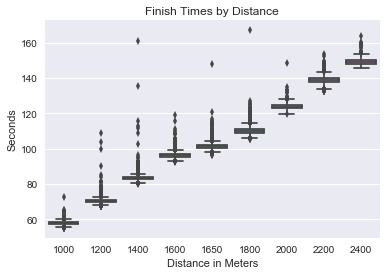

In [393]:
# Exploritory Plots

# Distance vs Finish_Time
ax = sns.boxplot(x="Distance", y="Finish_Time", data=races)
plt.title('Finish Times by Distance')
plt.ylabel('Seconds')
plt.xlabel('Distance in Meters')
plt.show()

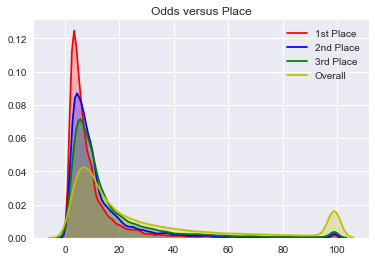

In [408]:
# Place vs Draw
plotDF = races.loc[races['Place']==1]
plt.title('Odds versus Place')
ax = sns.kdeplot(plotDF['Odds'], shade=True, color="r")
plotDF = races.loc[races['Place']==2]
ax = sns.kdeplot(plotDF['Odds'], shade=True, color="b")
plotDF = races.loc[races['Place']==3]
ax = sns.kdeplot(plotDF['Odds'], shade=True, color="g")
ax = sns.kdeplot(races['Odds'], shade=True, color="y")
L=plt.legend()
L.get_texts()[0].set_text('1st Place')
L.get_texts()[1].set_text('2nd Place')
L.get_texts()[2].set_text('3rd Place')
L.get_texts()[3].set_text('Overall')
plt.show()

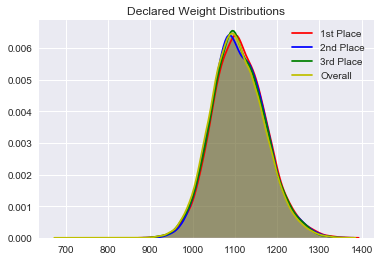

In [409]:
# Weight Distributions
plotDF = races.loc[races['Place']==1]
plt.title('Declared Weight Distributions')
ax = sns.kdeplot(plotDF['Declar_wt'], shade=True, color="r")
plotDF = races.loc[races['Place']==2]
ax = sns.kdeplot(plotDF['Declar_wt'], shade=True, color="b")
plotDF = races.loc[races['Place']==3]
ax = sns.kdeplot(plotDF['Declar_wt'], shade=True, color="g")
ax = sns.kdeplot(races['Declar_wt'], shade=True, color="y")
L=plt.legend()
L.get_texts()[0].set_text('1st Place')
L.get_texts()[1].set_text('2nd Place')
L.get_texts()[2].set_text('3rd Place')
L.get_texts()[3].set_text('Overall')
plt.show()

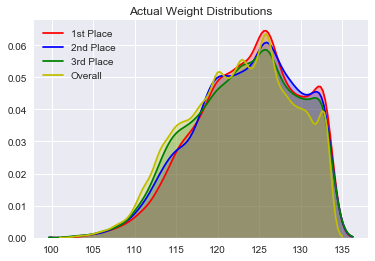

In [410]:
# Additional Weight Distributions
plotDF = races.loc[races['Place']==1]
plt.title('Actual Weight Distributions')
ax = sns.kdeplot(plotDF['Act_wt'], shade=True, color="r")
plotDF = races.loc[races['Place']==2]
ax = sns.kdeplot(plotDF['Act_wt'], shade=True, color="b")
plotDF = races.loc[races['Place']==3]
ax = sns.kdeplot(plotDF['Act_wt'], shade=True, color="g")
ax = sns.kdeplot(races['Act_wt'], shade=True, color="y")
L=plt.legend()
L.get_texts()[0].set_text('1st Place')
L.get_texts()[1].set_text('2nd Place')
L.get_texts()[2].set_text('3rd Place')
L.get_texts()[3].set_text('Overall')
plt.show()

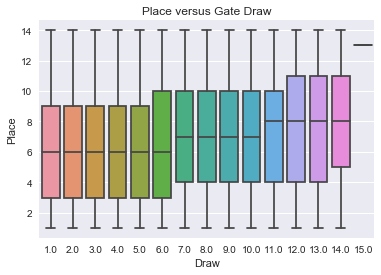

In [397]:
# Distance vs Finish_Time
ax = sns.boxplot(x="Draw", y="Place", data=races)
plt.title('Place versus Gate Draw')
plt.show()

In [502]:
# Figure out the difference in weight since last race and days between last race
races['Wt_diff'] = 0
races['Rest'] = 0

for horse in fullHorses:
    tempDF = races.loc[races['Horse'] == horse]
    wt_diff = tempDF['Declar_wt'].diff()
    date_diff = tempDF['Date'].diff()
    for i in range(0,len(wt_diff)):
        races.loc[wt_diff.index[i],'Wt_diff'] = abs(wt_diff.values[i])
        races.loc[date_diff.index[i],'Rest'] = date_diff.values[i]

In [428]:
# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

             Act_wt         Class     Declar_wt      Distance          Draw  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829      3.600861   1106.525948   1419.588602      6.854600   
std        6.306864      0.998223     62.657470    277.397225      3.744321   
min      103.000000      1.000000    693.000000   1000.000000      1.000000   
25%      118.000000      3.000000   1063.000000   1200.000000      4.000000   
50%      123.000000      4.000000   1103.000000   1400.000000      7.000000   
75%      128.000000      4.000000   1148.000000   1650.000000     10.000000   
max      133.000000      5.000000   1365.000000   2400.000000     15.000000   

        Finish_Time          Odds         Place          Race         Track  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean      85.276336     28.373666      6.779272      5.235636      0.664722   
std       18.505297     29.791262      3.728513    

Act_wt  Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124      5  2007-09-09     1213.0      1200  10.0        70.10   
1         116      5  2007-09-09     1049.0      1200  12.0        70.30   
2         122      5  2007-09-09     1079.0      1200   7.0        70.40   
3         119      5  2007-09-09     1039.0      1200  11.0        70.50   
4         124      5  2007-09-09     1061.0      1200   8.0        70.60   
5         114      5  2007-09-09     1207.0      1200   6.0        70.80   
6         114      5  2007-09-09     1042.0      1200   1.0        70.80   
7         130      5  2007-09-09     1084.0      1200   3.0        70.90   
8         130      5  2007-09-09     1244.0      1200  13.0        70.90   
9         118      5  2007-09-09     1101.0      1200   5.0        70.90   
10        133      5  2007-09-09     1142.0      1200   2.0        71.10   
11        132      5  2007-09-09     1028.0      1200   9.0        71.30   
12        121      5  2007-09-09      992.0      1200  14.0        71.90   
13        121      5  2007-09-09     1084.0      1400   3.0        83.00   
14        124      5  2007-09-09      991.0      1400   5.0        83.20   
15        119      5  2007-09-09     1100.0      1400   6.0        83.60   
16        129      5  2007-09-09     1091.0      1400   2.0        83.60   
17        131      5  2007-09-09     1030.0      1400  12.0        83.60   
18        116      5  2007-09-09     1106.0      1400   9.0        83.60   
19        128      5  2007-09-09      992.0      1400   1.0        83.70   
20        117      5  2007-09-09     1020.0      1400  10.0        83.70   
21        121      5  2007-09-09     1108.0      1400   4.0        83.80   
22        120      5  2007-09-09     1032.0      1400   8.0        83.90   
23        114      5  2007-09-09     1099.0      1400   7.0        83.90   
24        131      5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...    ...         ...        ...       ...   ...          ...   
98517     126      3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118      3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133      3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115      3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119      3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116      3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126      3  2018-07-15      982.0      1200  10.0        71.39   
98524     119      3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128      3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125      3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120      3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122      2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121      2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123      2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124      2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119      2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121      2  2018-07-15      992.0      1400   9.0        83.18   
98534     121      2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122      2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123      2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128      2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126      2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116      2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123      2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118      2  2018-07-15     1122.0      1400   6.0        85.53   

                          Horse        Jockey  Odds  P

In [505]:
# Filling in non-number values with 0 for weight difference
races.loc[races['Wt_diff'].isna() ,'Wt_diff'] = 0

# Correcting days of rest into integers

# Creating an empty list for the integer day values
correctedRest = []
# Looping over all of the rows in the list of timedeltas
for row in races['Rest']:
    # Trying to locate only the integer day value and appending to the list
    try:
        correctedRest.append(row.days)
    # Excepting non timedelta values and appending NaN to the list
    except:
        correctedRest.append(float('NaN'))

# Replacing the Rest column with the correctedRest list
races['Rest'] = correctedRest
# Deleting the list for memory purposes
del correctedRest

# Imputing the rounded mean of days of rest for all the missing values
races.loc[races['Rest'].isna(), 'Rest'] = round(races['Rest'].mean(),0)

# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

             Act_wt         Class     Declar_wt      Distance          Draw  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829      3.600861   1106.525948   1419.588602      6.854600   
std        6.306864      0.998223     62.657470    277.397225      3.744321   
min      103.000000      1.000000    693.000000   1000.000000      1.000000   
25%      118.000000      3.000000   1063.000000   1200.000000      4.000000   
50%      123.000000      4.000000   1103.000000   1400.000000      7.000000   
75%      128.000000      4.000000   1148.000000   1650.000000     10.000000   
max      133.000000      5.000000   1365.000000   2400.000000     15.000000   

        Finish_Time          Odds         Place          Race         Track  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean      85.276336     28.373666      6.779272      5.235636      0.664722   
std       18.505297     29.791262      3.728513    

Act_wt  Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124      5  2007-09-09     1213.0      1200  10.0        70.10   
1         116      5  2007-09-09     1049.0      1200  12.0        70.30   
2         122      5  2007-09-09     1079.0      1200   7.0        70.40   
3         119      5  2007-09-09     1039.0      1200  11.0        70.50   
4         124      5  2007-09-09     1061.0      1200   8.0        70.60   
5         114      5  2007-09-09     1207.0      1200   6.0        70.80   
6         114      5  2007-09-09     1042.0      1200   1.0        70.80   
7         130      5  2007-09-09     1084.0      1200   3.0        70.90   
8         130      5  2007-09-09     1244.0      1200  13.0        70.90   
9         118      5  2007-09-09     1101.0      1200   5.0        70.90   
10        133      5  2007-09-09     1142.0      1200   2.0        71.10   
11        132      5  2007-09-09     1028.0      1200   9.0        71.30   
12        121      5  2007-09-09      992.0      1200  14.0        71.90   
13        121      5  2007-09-09     1084.0      1400   3.0        83.00   
14        124      5  2007-09-09      991.0      1400   5.0        83.20   
15        119      5  2007-09-09     1100.0      1400   6.0        83.60   
16        129      5  2007-09-09     1091.0      1400   2.0        83.60   
17        131      5  2007-09-09     1030.0      1400  12.0        83.60   
18        116      5  2007-09-09     1106.0      1400   9.0        83.60   
19        128      5  2007-09-09      992.0      1400   1.0        83.70   
20        117      5  2007-09-09     1020.0      1400  10.0        83.70   
21        121      5  2007-09-09     1108.0      1400   4.0        83.80   
22        120      5  2007-09-09     1032.0      1400   8.0        83.90   
23        114      5  2007-09-09     1099.0      1400   7.0        83.90   
24        131      5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...    ...         ...        ...       ...   ...          ...   
98517     126      3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118      3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133      3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115      3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119      3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116      3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126      3  2018-07-15      982.0      1200  10.0        71.39   
98524     119      3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128      3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125      3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120      3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122      2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121      2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123      2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124      2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119      2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121      2  2018-07-15      992.0      1400   9.0        83.18   
98534     121      2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122      2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123      2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128      2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126      2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116      2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123      2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118      2  2018-07-15     1122.0      1400   6.0        85.53   

                          Horse        Jockey  Odds  P

In [506]:
# Creating a speed column 

# Creating an empty list to store the speed values
speed = []
# Looping over all of the rows finish times and distances to find the meters per second
for time in races[['Finish_Time', 'Distance']].iterrows():
    speed.append(time[1]['Distance']/time[1]['Finish_Time'])
# Creating a speed column with all of the values from the speed list
races['Speed'] = speed
# Deleting the speed list for memory purposes
del speed

# Obtaining descriptive stats for the columns
print(races.describe())
# Viewing updated dataframe to see what to address next
races

             Act_wt         Class     Declar_wt      Distance          Draw  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean     122.650829      3.600861   1106.525948   1419.588602      6.854600   
std        6.306864      0.998223     62.657470    277.397225      3.744321   
min      103.000000      1.000000    693.000000   1000.000000      1.000000   
25%      118.000000      3.000000   1063.000000   1200.000000      4.000000   
50%      123.000000      4.000000   1103.000000   1400.000000      7.000000   
75%      128.000000      4.000000   1148.000000   1650.000000     10.000000   
max      133.000000      5.000000   1365.000000   2400.000000     15.000000   

        Finish_Time          Odds         Place          Race         Track  \
count  98542.000000  98542.000000  98542.000000  98542.000000  98542.000000   
mean      85.276336     28.373666      6.779272      5.235636      0.664722   
std       18.505297     29.791262      3.728513    

Act_wt  Class        Date  Declar_wt  Distance  Draw  Finish_Time  \
0         124      5  2007-09-09     1213.0      1200  10.0        70.10   
1         116      5  2007-09-09     1049.0      1200  12.0        70.30   
2         122      5  2007-09-09     1079.0      1200   7.0        70.40   
3         119      5  2007-09-09     1039.0      1200  11.0        70.50   
4         124      5  2007-09-09     1061.0      1200   8.0        70.60   
5         114      5  2007-09-09     1207.0      1200   6.0        70.80   
6         114      5  2007-09-09     1042.0      1200   1.0        70.80   
7         130      5  2007-09-09     1084.0      1200   3.0        70.90   
8         130      5  2007-09-09     1244.0      1200  13.0        70.90   
9         118      5  2007-09-09     1101.0      1200   5.0        70.90   
10        133      5  2007-09-09     1142.0      1200   2.0        71.10   
11        132      5  2007-09-09     1028.0      1200   9.0        71.30   
12        121      5  2007-09-09      992.0      1200  14.0        71.90   
13        121      5  2007-09-09     1084.0      1400   3.0        83.00   
14        124      5  2007-09-09      991.0      1400   5.0        83.20   
15        119      5  2007-09-09     1100.0      1400   6.0        83.60   
16        129      5  2007-09-09     1091.0      1400   2.0        83.60   
17        131      5  2007-09-09     1030.0      1400  12.0        83.60   
18        116      5  2007-09-09     1106.0      1400   9.0        83.60   
19        128      5  2007-09-09      992.0      1400   1.0        83.70   
20        117      5  2007-09-09     1020.0      1400  10.0        83.70   
21        121      5  2007-09-09     1108.0      1400   4.0        83.80   
22        120      5  2007-09-09     1032.0      1400   8.0        83.90   
23        114      5  2007-09-09     1099.0      1400   7.0        83.90   
24        131      5  2007-09-09     1102.0      1400  11.0        84.00   
...       ...    ...         ...        ...       ...   ...          ...   
98517     126      3  2018-07-15     1027.0      1200   9.0        70.64   
98518     118      3  2018-07-15     1148.0      1200   8.0        70.71   
98519     133      3  2018-07-15     1206.0      1200   3.0        70.83   
98520     115      3  2018-07-15     1048.0      1200   6.0        71.07   
98521     119      3  2018-07-15     1211.0      1200  11.0        71.16   
98522     116      3  2018-07-15     1060.0      1200   1.0        71.24   
98523     126      3  2018-07-15      982.0      1200  10.0        71.39   
98524     119      3  2018-07-15     1020.0      1200   7.0        71.39   
98525     128      3  2018-07-15     1180.0      1200   5.0        71.61   
98526     125      3  2018-07-15     1118.0      1200  13.0        71.73   
98527     120      3  2018-07-15     1077.0      1200  12.0        71.93   
98528     122      2  2018-07-15     1193.0      1400   8.0        82.33   
98529     121      2  2018-07-15     1072.0      1400  14.0        82.34   
98530     123      2  2018-07-15     1175.0      1400   1.0        82.40   
98531     124      2  2018-07-15     1097.0      1400  13.0        82.64   
98532     119      2  2018-07-15     1108.0      1400   7.0        83.07   
98533     121      2  2018-07-15      992.0      1400   9.0        83.18   
98534     121      2  2018-07-15     1059.0      1400  10.0        83.39   
98535     122      2  2018-07-15     1049.0      1400  11.0        83.89   
98536     123      2  2018-07-15     1135.0      1400   4.0        84.00   
98537     128      2  2018-07-15     1140.0      1400   3.0        84.13   
98538     126      2  2018-07-15     1098.0      1400   2.0        84.33   
98539     116      2  2018-07-15     1140.0      1400  12.0        84.86   
98540     123      2  2018-07-15     1028.0      1400   5.0        85.03   
98541     118      2  2018-07-15     1122.0      1400   6.0        85.53   

                          Horse        Jockey  Odds  P

In [450]:
####TESTING FOR FUTURE FEATURE EXTRACTION

# Finding the experience of the horses
testDF = races.loc[races['Horse'] == 'DAO DAO(H308)']
# Setting experience and placing percentages to 0 to add the columns to the dataframe
testDF['Exp'] = 0
testDF['1st_Pl'] = 0
testDF['2nd_Pl'] = 0
testDF['3rd_Pl'] = 0
testDF['Avg_Pl'] = 0
testDF['Recent_Avg_Pl'] = 0
testDF['Avg_Speed'] = 0
testDF['Recent_Avg_Speed'] = 0
# Looping over every horse in every race
for index, horse in testDF.iterrows():
    # Initilizing the places to 0
    wins = 0
    seconds = 0
    thirds = 0
    # Creating a temporary dataframe base on the horses name and the date of the current race
    tempDF = testDF.loc[(testDF['Horse'] == horse['Horse']) & (races['Date'] < pd.to_datetime(horse['Date']).date())]
    # Assigning the horses experience by taking the length of the dataframes indexes and subtracking one for the 
    # current race
    exp = len(tempDF.index)
    testDF.loc[index,'Exp'] = exp
    # Looping over the created dataframe to extract how many 1st, 2nd, and 3rd places won
    for i in range(0,len(tempDF.index)):
        if tempDF.loc[tempDF.index[i],'Place'] == 1:
            wins += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 2:
            seconds += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 3:
            thirds += 1


    try:
        
        testDF.loc[index,'1st_Pl'] = wins/exp
        testDF.loc[index,'2nd_Pl'] = seconds/exp
        testDF.loc[index,'3rd_Pl'] = thirds/exp

    except ZeroDivisionError:

        testDF.at[index,'1st_Pl'] = 0
        testDF.at[index,'2nd_Pl'] = 0
        testDF.at[index,'3rd_Pl'] = 0
        
    tempDF = testDF.loc[(testDF['Horse'] == horse['Horse']) & (races['Date'] <= pd.to_datetime(horse['Date']).date())]
    # Assigning the horses experience by taking the length of the dataframes indexes and subtracking one for the 
    # current race
    avg = tempDF['Place'].mean()
    testDF.loc[index,'Avg_Pl'] = avg 
    avgSp = tempDF['Speed'].mean()
    testDF.loc[index,'Avg_Speed'] = avgSp 
    
    tempDF = testDF.loc[(testDF['Horse'] == horse['Horse']) & (races['Date'] <= pd.to_datetime(horse['Date']).date())]
    # Assigning the horses experience by taking the length of the dataframes indexes and subtracking one for the 
    # current race
    tempDF = tempDF.tail(5)
    last_5_avg = tempDF['Place'].mean()
    testDF.loc[index,'Recent_Avg_Pl'] = last_5_avg 
    last_5_avgSp = tempDF['Speed'].mean()
    testDF.loc[index,'Recent_Avg_Speed'] = last_5_avgSp 


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [511]:
# Finding the experience of the horses

# Setting experience and placing percentages to 0 to add the columns to the dataframe
races['Exp'] = 0
races['1st_Pl'] = 0
races['2nd_Pl'] = 0
races['3rd_Pl'] = 0

# Looping over every horse in every race
for index, horse in races.iterrows():
    # Initilizing the places to 0
    print(horse['Date'])
    wins = 0
    seconds = 0
    thirds = 0
    # Creating a temporary dataframe base on the horses name and the date of the current race
    tempDF = races.loc[(races['Horse'] == horse['Horse']) & (races['Date'] < pd.to_datetime(horse['Date']).date())]
    # Assigning the horses experience by taking the length of the dataframes indexes and subtracking one for the 
    # current race
    exp = len(tempDF.index)
    races.loc[index,'Exp'] = exp 
    # Looping over the created dataframe to extract how many 1st, 2nd, and 3rd places won
    for i in range(0,len(tempDF.index)):
        if tempDF.loc[tempDF.index[i],'Place'] == 1:
            wins += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 2:
            seconds += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 3:
            thirds += 1
    try:
        races.loc[index,'1st_Pl'] = wins/exp
        races.loc[index,'2nd_Pl'] = seconds/exp
        races.loc[index,'3rd_Pl'] = thirds/exp
    except ZeroDivisionError:
        print("divide by zero")
    
    

2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
d

divide by zero
2007-09-15
divide by zero
2007-09-15
2007-09-15
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-15
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
2007-09-19
2007-09-19
divide by zero
2007-09-19
2007-09-19
divide by zero
2007-09-19
2007-09-19
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
2007-09-19
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
divide by zero
2007-09-19
2007-09-19
divide by zero
2007-09-19
2007-09-19
2007-09-19
divide by zero
2007-09-19
200

2007-10-01
divide by zero
2007-10-01
2007-10-01
2007-10-01
divide by zero
2007-10-01
2007-10-01
divide by zero
2007-10-01
2007-10-01
2007-10-01
divide by zero
2007-10-07
divide by zero
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
divide by zero
2007-10-07
divide by zero
2007-10-07
divide by zero
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
2007-10-07
divide by zero
2007-10-07
2007-10-07
divide by zero
2007-10-07
divide by zero
2007-10-07
2007-10-07
200

2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
divide by zero
2007-10-28
2007-10-28
2007-10-28
divide by zero
2007-10-28
2007-10-28
divide by zero
2007-10-28
divide by zero
2007-10-28
2007-10-28
divide by zero
2007-10-28
divide by zero
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
divide by zero
2007-10-28
divide by zero
2007-10-28
2007-10-28
divide by zero
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
divide by zero
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
divide by zero
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
divide by zero
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
divide by zero
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
divide by zero
2007-11-03
2007-11-03
2007-11-03
divide by zero
2007-11-03
2007-

2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
divide by zero
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-17
2007-11-21
divide by zero
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
divide by zero
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
divide by zero
2007-11-21
2007-11-21
2007-11-21
2007-11-21
divide by zero
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
divide by zero
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-21
2007-11-

2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-09
2007-12-19
divide by zero
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
divide by zero
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-19
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
20

2008-01-12
2008-01-12
divide by zero
2008-01-12
divide by zero
2008-01-12
divide by zero
2008-01-12
divide by zero
2008-01-12
divide by zero
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2008-01-12
2

2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
divide by zero
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
divide by zero
2008-02-02
2008-02-02
divide by zero
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-02
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
divide by zero
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
divide by zero
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2008-02-09
2

2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
divide by zero
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
divide by zero
2008-03-01
2008-03-01
2008-03-01
2008-03-01
divide by zero
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-01
2008-03-0

2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
divide by zero
2008-03-24
divide by zero
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
divide by zero
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
divide by zero
2008-03-24
divide by zero
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
2008-03-24
divide by zero
2008-03-24
2008-03-30
divide by zero
2008-03-30
2008-03-30
2008-03-30
divide by zero
2008-03-30
divide by zero
2008-03-30
divide by zero
2008-03-30
2008-03-30
2008-03-30
2008-03-30
2008-03-30
2008-03-30
divide by zero
2008-03-30
2008-03-30
2008-03-30
2008-03-30
2008-03-30
divide by zero
2008-03-30
2008-03-30
2008-0

2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-23
2008-04-27
2008-04-27
2008-04-27
2008-04-27
divide by zero
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-04-27
2008-0

2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-18
2008-05-25
divide by zero
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-05-25
2008-0

divide by zero
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
divide by zero
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
divide by zero
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
divide by zero
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
divide by zero
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2008-06-22
2

2008-09-28
divide by zero
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
divide by zero
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
divide by zero
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
divide by zero
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
divide by zero
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
divide by zero
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-28
2008-09-

2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
divide by zero
2008-10-19
2008-10-19
2008-10-19
2008-10-19
divide by zero
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
divide by zero
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
divide by zero
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
divide by zero
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2008-10-26
2

2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
divide by zero
2008-11-16
2008-11-16
divide by zero
2008-11-16
divide by zero
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
divide by zero
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-

2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
divide by zero
2008-12-06
2008-12-06
divide by zero
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
divide by zero
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
divide by zero
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
divide by zero
2008-12-06
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2008-12-10
2

2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
divide by zero
2009-01-01
divide by zero
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
divide by zero
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
divide by zero
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
divide by zero
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2

2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
divide by zero
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
divide by zero
2009-01-24
2009-01-24
2009-01-24
divide by zero
2009-01-24
2009-01-24
2009-01-24
2009-01-24
divide by zero
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-

2009-02-11
2009-02-11
2009-02-15
divide by zero
2009-02-15
divide by zero
2009-02-15
divide by zero
2009-02-15
divide by zero
2009-02-15
divide by zero
2009-02-15
divide by zero
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
divide by zero
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009

2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
divide by zero
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-07
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-0

2009-04-05
divide by zero
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-05
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-0

2009-05-01
2009-05-01
divide by zero
2009-05-01
2009-05-01
divide by zero
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-01
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
divide by zero
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
divide by zero
2009-05-03
2009-05-03
2009-05-03
divide by zero
2009-05-03
2009-05-03
2009-05-03
2009-05-03
divide by zero
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
divide by zero
2009-05-03
divide by zero
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
divide by zero
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05

2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
divide by zero
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-24
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
divide by zero
2009-05-27
20

2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-13
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
divide by zero
2009-06-21
2009-06-21
2009-06-21
2009-06-21
divide by zero
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
divide by zero
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-21
2009-06-2

2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-16
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
divide by zero
2009-09-20
2009-09-20
divide by zero
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
divide by zero
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
divide by zero
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-09-20
2009-

2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
divide by zero
2009-10-11
divide by zero
2009-10-11
divide by zero
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
divide by zero
2009-10-11
2009-10-11
2009-10-11
divide by zero
2009-10-11
2009-10-11
2009-10-11
divide by zero
2009-10-11
divide by zero
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009-10-11
2009

2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-04
2009-11-07
divide by zero
2009-11-07
2009-11-07
2009-11-07
2009-11-07
divide by zero
2009-11-07
divide by zero
2009-11-07
divide by zero
2009-11-07
2009-11-07
divide by zero
2009-11-07
2009-11-07
2009-11-07
2009-11-07
divide by zero
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-07
2009-11-

2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-25
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
divide by zero
2009-11-29
divide by zero
2009-11-29
divide by zero
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
divide by zero
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
2009-11-29
200

2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
divide by zero
2009-12-19
2009-12-19
divide by zero
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
divide by zero
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
divide by zero
2009-12-19
divide by zero
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
divide by zero
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
divide by zero
2009-12-19
2009-12-19
2009-12-19
divide by zero
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-19
2009-12-23
2009-12-23
2009-12-23
2009-12-23
2009-12-23
2009-12-23
2009-12-23


2010-01-10
2010-01-10
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-13
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16
2010-01-16

2010-02-03
2010-02-03
2010-02-03
2010-02-03
divide by zero
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-07
divide by zero
2010-02-07
2010-02-07
2010-02-07
2010-02-07
divide by zero
2010-02-07
divide by zero
2010-02-07
2010-02-07
divide by zero
2010-02-07
2010-02-07
2010-02-07
divide by zero
2010-02-07
2010-02-07
divide by zero
2010-02-07
divide by zero
2010-02-07
divide by zero
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
divide by zero
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
2010-02-07
divide by zero
2010-02-07
2010-02-07
divide by zero
2010-02-07
2010-02-07
divide by zero
2010-02-07
2010-02-07
2010-02-07
20

2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
divide by zero
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
divide by zero
2010-02-28
divide by zero
2010-02-28
2010-02-28
divide by zero
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
divide by zero
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
divide by zero
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
2010-02-28
divide by zero
2010-02-28
2010-02-28
2010-02-28
2010

2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
divide by zero
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-03-31
2010-0

2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
divide by zero
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
divide by zero
2010-04-25
2010-04-25
divide by zero
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-2

2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
divide by zero
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-23
divide by zero
2010-05-23
divide by zero
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
divide by zero
2010-05-23
divide by zero
2010-05-23
2010-05-23
2010-05-23
divide by zero
2010-05-23
2010-05-23
2010-05-23
2010-05-23
divide by zero
2010-05-23
2010-05-23
2010-05-23
divide by zero
2010-05-23
2010-05-23
2010-05-23
2010-05-23
divide by z

2010-06-16
divide by zero
2010-06-16
divide by zero
2010-06-16
divide by zero
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
divide by zero
2010-06-16
2010-06-16
2010-06-16
divide by zero
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
divide by zero
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-

2010-07-07
divide by zero
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
divide by zero
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
divide by zero
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-1

2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23

2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
divide by zero
2010-10-17
2010-10-17
2010-10-17
divide by zero
2010-10-17
2010-10-17
divide by zero
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
divide by zero
2010-10-17
divide by zero
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
divide by zero
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
divide by zero
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010

2010-11-10
2010-11-10
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
divide by zero
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
divide by zero
2010-11-14
divide by zero
2010-11-14
divide by zero
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
divide by zero
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
divide by zero
2010-11-14
2010-11-14
2010-11-14
divide by zero
2010-11-14
2010

2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
divide by zero
2010-12-04
2010-12-04
2010-12-04
2010-12-04
divide by zero
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
divide by zero
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-0

2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
divide by zero
2010-12-27
2010-12-27
2010-12-27
2010-12-27
divide by zero
2010-12-27
divide by zero
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
divide by zero
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2010-12-27
2011-

2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-19
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
divide by zero
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
divide by zero
2011-01-23
2011-01-23
divide by zero
2011-01-23
divide by zero
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-

2011-02-12
2011-02-12
2011-02-12
2011-02-12
2011-02-12
2011-02-12
divide by zero
2011-02-12
2011-02-12
2011-02-12
2011-02-12
2011-02-12
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
divide by zero
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-16
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
20

2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
2011-03-12
divide by zero
2011-03-12
divide by zero
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
divide by zero
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03-12
2011-03

2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
divide by zero
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011-04-03
2011

2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
divide by zero
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-04-25
2011-05-01
divide by zero
2011-05-01
2011-05-01
2011-05-01
divide by zero
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
divide by zero
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
divide by zero
2011-05-01
2011-05-01
divide by zero
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-01
2011-05-

2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-21
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25
2011-05-25

2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
divide by zero
2011-06-15
divide by zero
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-19
2011-06-19
2011-06-19
divide by zero
2011-06-19
divide by zero
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
divide by zero
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
divide by zero
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-19
2011-06-

2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
divide by zero
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
divide by zero
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
divide by zero
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-11
2011-09-1

2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
divide by zero
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
divide by zero
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-06
2011-10-06
2011-10-06
2011-10-06
20

2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
divide by zero
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
divide by zero
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
divide by zero
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-26
2011-10-2

2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
divide by zero
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
divide by zero
2011-11-20
divide by zero
2011-11-20
2011-11-20
divide by zero
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
divide by zero
2011-11-20
divide by zero
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-

2011-12-07
2011-12-07
2011-12-07
2011-12-07
divide by zero
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
divide by zero
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-07
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
divide by zero
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero


2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
divide by zero
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
divide by zero
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
divide by zero
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
divide by zero
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-

2012-01-25
2012-01-25
2012-01-25
divide by zero
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-01-25
2012-0

2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
divide by zero
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
divide by zero
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
divide by zero
2012-02-15
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-1

2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
divide by zero
2012-03-10
divide by zero
2012-03-10
divide by zero
2012-03-10
2012-03-10
2012-03-10
2012-03-10
divide by zero
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-

2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
divide by zero
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
divide by zero
2012-04-01
2012-04-09
divide by zero
2012-04-09
divide by zero
2012-04-09
divide by zero
2012-04-09
divide by zero
2012-04-09
divide by zero
2012-04-09
divide by zero
2012-04-09
2012-04-09
2012-04-09
2012-04-09
2012-04-09
2012-04-09


divide by zero
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
divide by zero
2012-04-29
2012-04-29
2012-04-29
divide by zero
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-0

2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
divide by zero
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
divide by zero
2012-05-27
2012-05-27
2012-05-27
2012-05-27
divide by zero
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-27
divide by zero
2012-05-27
2012-05-27
2012-05-27
2012-05-27
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-

2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-20
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24

2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
divide by zero
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
divide by zero
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
divide by zero
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-08
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-12
2012-09-1

2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
divide by zero
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-06
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
divide by zero
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
2012-10-10
20

2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
divide by zero
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
divide by zero
2012-11-04
2012-11-04
divide by zero
2012-11-04
2012-11-04
2012-11-04
divide by zero
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
divide by zero
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
2012-11-04
divide by zero
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
divide by zero
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
2012-11-07
divide by zero
2012-11-07


2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
divide by zero
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
2012-11-25
divide by zero
2012-11-25
2012-11-25
divide by zero
2012-11-25
2012-11-25
2012-11-25
2012-11-25
divide by zero
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
divide by zero
2012-11-28
2012-11-28
2012-11-28
2012-11-28
divide by zero
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
divide by zero
2012-11-28
2012-11-28
2012-11-28
divide by zero
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28
2012-11-28


2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
divide by zero
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
2012-12-19
divide by zero
2012-12-22
divide by zero
2012-12-22
2012-12-22
2012-12-22
2012-12-22
2012-12-22
2012-12-22
divide by zero
2012-12-22
2012-12-22
2012-12-22
2012-12-22
2012-12-22
2012-12-22
divide by zero
2012-12-22
2012-12-22
2012-12-22
2012-12-22
2

2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
divide by zero
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
divide by zero
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
divide by zero
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
divide by zero
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2013-

2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
divide by zero
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
divide by zero
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
divide by zero
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
divide by zero
2013-02-06
divide by zero
2013-02-06
2013-02-06
2013-02-06
2

2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
divide by zero
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
divide by zero
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
divide by zero
2013-03-02
2013-03-02
divide by zero
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-

2013-03-24
2013-03-24
2013-03-24
2013-03-24
divide by zero
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-0

2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
divide by zero
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
divide by zero
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
divide by zero
2013-04-20
2013-04-20
2013-04-20
divide by zero
2013-04-20
2013-04-20
divide by zero
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2

2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
divide by zero
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
divide by zero
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-08
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
divide by zero
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-1

2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
divide by zero
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
divide by zero
2013-06-02
2013-06-02
2013-06-02
divide by zero
2013-06-02
2013-06-02
2013-06-02
2013-06-02
divide by zero
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
2013-06-02
divide by zero
2013-06-02
2013-06-02
divide by ze

2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
divide by zero
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
divide by zero
2013-06-23
2013-06-23
2013-06-23
2013-06-23
20

2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
divide by zero
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-0

2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
divide by zero
2013-10-12
2013-10-12
divide by zero
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
divide by zero
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
divide by zero
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
divide by zero
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2

2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
divide by zero
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
divide by zero
2013-11-09
divide by zero
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
divide by zero
2013-11-09
2013-11-09
divide by zero
2013-11-09
2013-11-09
divide by zero
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
divide by zero
2013-11-09
2013

2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
divide by zero
2013-12-08
2013-1

2013-12-29
2013-12-29
2013-12-29
2013-12-29
2013-12-29
2013-12-29
2013-12-29
2013-12-29
2013-12-29
2013-12-29
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
divide by zero
2014-01-01
divide by zero
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
divide by zero
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
divide by zero
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-

2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
divide by zero
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
divide by zero
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
divide by zero
2014-01-26
2014-01-26
2014-01-26
2014-01-26
divide by zero
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
divide by zero
2014-01-26
2014-01-26
divide by zero
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-01-26
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-

2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
divide by zero
2014-02-23
divide by zero
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
2014-02-23
divide by zero
2014-02-23
2014-02-23
divide by zero
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-02-26
2014-

2014-03-19
2014-03-19
2014-03-19
2014-03-19
2014-03-19
2014-03-19
2014-03-19
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
divide by zero
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
divide by zero
2014-03-23
divide by zero
2014-03-23
2014-03-23
2014-03-23
divide by zero
2014-03-23
2014-03-23
2014-03-23
2014-03-23
divide by zero
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
2014-03-23
divide by zer

2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
divide by zero
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
divide by zero
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
divide by zero
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-16
2014-04-1

2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
divide by zero
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
divide by zero
2014-05-10
2014-05-10
2014-05-10
2014-05-10
divide by zero
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
divide by zero
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-10
2014-05-14
2014-

2014-06-01
2014-06-01
divide by zero
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
divide by zero
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
2014-06-05
20

2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25

2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
divide by zero
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
divide by zero
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
20

2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
divide by zero
2014-10-12
2014-10-12
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
divide by zero
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-19
2014-10-19
2014-10-19
2014-10-19
2014-10-19
2014-10-19
2014-10-19
2014-10-19
20

2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
divide by zero
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-02
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
divide by zero
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
divide by zero
2014-11-09
divide by zero
2014-11-09
2014-11-09
2014-11-09
divide by zero
2014-11-09
divide by zero
2014-11-09
divide by zero
2014-11-09
divide by zero
2014-11-09
2014-11-09
divide by zero
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
divide by zero
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
201

2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
divide by zero
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
divide by zero
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
divide by zero
2014-11-30
2014-11-30
divide by zero
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
divide by zero
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
divide by zero
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-30
2014-11-

2014-12-20
2014-12-20
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
divide by zero
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20
2014-12-20


2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
divide by zero
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01

divide by zero
2015-02-01
2015-02-01
divide by zero
2015-02-01
2015-02-01
divide by zero
2015-02-01
2015-02-01
2015-02-01
2015-02-01
divide by zero
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
divide by zero
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
divide by zero
2015-02-01
2015-02-01
2015-02-01
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-04
2015-02-

2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
divide by zero
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
divide by zero
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
divide by zero
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
divide by zero
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-

divide by zero
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
divide by zero
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
divide by zero
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
divide by zero
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-

2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
divide by zero
2015-04-19
2015-04-19
2015-04-19
2015-04-19
divide by zero
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
20

2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
divide by zero
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
divide by zero
2015-05-09
divide by zero
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
divide by zero
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
divide by zero
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2

2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
divide by zero
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
divide by zero
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-05-31
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
20

2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
divide by zero
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-24
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
divide by zero
2015-06-27
2015-06-27
2015-06-27
2015-06-27
divide by zero
2015-06-27
2015-06-2

2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
divide by zero
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-06
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
divide by zero
2015-09-09
2015-09-09
2015-09-09
divide by zero
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-0

2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
divide by zero
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-01
divide by zero
2015-10-01
2015-10-01
2015-10-01
2015-10-01
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
divide by zero
2015-10-04
divide by zero
2015-10-04
2015-10-04
2015-

2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-22
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
divide by zero
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
divide by zero
2015-10-25
divide by zero
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
divide by zero
2015-10-25
2015-10-25
divide by zero
2015-10-25
2015-10-25
2015-10-25
2015-10-25
divide by zero
2015-10-25
2015-10-25
divide by zero
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015-10-25
2015

2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
divide by zero
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-11-21
2015-1

2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
divide by zero
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
divide by zero
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
2015-12-13
2015-12-13
2015-12-13
divide by zero
2015-12-13
divide by zero
2015-12-13
2015-12-13
divid

2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
divide by zero
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
divide by zero
2016-01-09
2016-01-09
divide by zero
2016-01-09
divide by zero
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-

2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
divide by zero
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-01-31
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
divide by zero
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
20

2016-02-24
2016-02-24
2016-02-24
2016-02-24
divide by zero
2016-02-24
2016-02-24
2016-02-24
divide by zero
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
divide by zer

2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
divide by zero
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
divide by zero
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
2016-03-13
20

2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
2016-04-03
divide by zero
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-0

2016-04-24
divide by zero
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
divide by zero
2016-04-24
divide by zero
2016-04-24
2016-04-24
divide by zero
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-04-27
2016-

2016-05-14
2016-05-14
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
divide by zero
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
divide by zero
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
2016-05-18
20

2016-06-09
2016-06-09
2016-06-09
2016-06-12
divide by zero
2016-06-12
divide by zero
2016-06-12
2016-06-12
divide by zero
2016-06-12
divide by zero
2016-06-12
divide by zero
2016-06-12
2016-06-12
2016-06-12
divide by zero
2016-06-12
divide by zero
2016-06-12
2016-06-12
divide by zero
2016-06-12
divide by zero
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06-12
2016-06

2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
divide by zero
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-07-06
2016-0

2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21
2016-09-21

2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-16
2016-10-16
divide by zero
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
divide by zero
2016-10-16
2016-10-16
divide by zero
2016-10-16
divide by zero
2016-10-16
divide by zero
2016-10-16
divide by zero
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-16
2016-10-

2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
divide by zero
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
divide by zero
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
divide by zero
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
divide by zero
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
divide by zero
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2

2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
divide by zero
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
divide by zero
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
20

2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
divide by zero
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
divide by zero
2016-12-17
2016-12-17
2016-12-17
2016-12-17
divide by zero
2016-12-17
2016-12-17
2016-12-17
2016-12-17
divide by zero
2016-12-17
2016-12-17
divide by zero
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2016-12-22
2

2017-01-14
divide by zero
2017-01-14
divide by zero
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
divide by zero
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
divide by zero
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
divide by zero
2017-01-14
2017-01-14
2017-01-14
2017-01-14
divide by zero
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-

2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
divide by zero
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
divide by zero
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-05
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
20

2017-02-26
2017-02-26
divide by zero
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
divide by zero
2017-02-26
2017-02-26
2017-02-26
divide by zero
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
divide by zero
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-

2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
divide by zero
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-22
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-0

2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
divide by zero
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-17
divide by zero
2017-04-17
divide by zero
2017-04-17
divide by zero
2017-04-17
divide by zero
2017-04-17
divide by zero
2017-04-17
divide by zero
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017-04-17
2017

2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
divide by zero
2017-05-07
divide by zero
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
divide by zero
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-10
2017-05-1

2017-05-28
2017-05-28
2017-05-28
divide by zero
2017-05-28
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
divide by zero
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
20

2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
divide by zero
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
divide by zero
2017-06-25
divide by zero
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
divide by zero
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
divide by zero
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2

divide by zero
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
divide by zero
2017-09-03
2017-09-03
divide by zero
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
divide by zero
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
divide by zero
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2

2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
divide by zero
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-1

2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22

2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
divide by zero
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-11
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11

2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-03
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06
2017-12-06

2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
divide by zero
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
divide by zero
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2017-12-27
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
2018-01-01
20

2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
divide by zero
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-01-24
2018-0

2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-14
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
divide by zero
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
divide by zero
2018-02-18
divide by zero
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
divide by zero
2018-02-18
2018-02-18
2018-02-18
divide by zero
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2018-02-18
2

2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
divide by zero
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-03-11
2018-0

2018-04-02
2018-04-02
2018-04-02
divide by zero
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
divide by zero
2018-04-02
divide by zero
2018-04-02
2018-04-02
divide by zero
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
divide by zero
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-08
divide by zero
2018-04-08
divide by zero
2018-04-08
2018-04-08
2018

2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
divide by zero
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
divide by zero
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
divide by zero
2018-04-2

2018-05-20
divide by zero
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
divide by zero
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
divide by zero
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
divide by zero
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-

2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
divide by zero
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
divide by zero
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
divide by zero
2018-06-13
2018-06-13
2018-06-13
2018-06-16
2018-06-16
2018-06-16
divide by zero
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-

2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
divide by zero
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
divide by zero
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
divide by zero
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-1

In [530]:
# Finding the experience of the jockies

# Setting experience and placing percentages to 0 to add the columns to the dataframe
races['Jockey_Exp'] = 0
races['Jockey_1st_Pl'] = 0
races['Jockey_2nd_Pl'] = 0
races['Jockey_3rd_Pl'] = 0

# Looping over every horse in every race
for index, horse in races.iterrows():
    # Initilizing the places to 0
    print(horse['Date'])
    wins = 0
    seconds = 0
    thirds = 0
    # Creating a temporary dataframe base on the horses name and the date of the current race
    tempDF = races.loc[(races['Jockey'] == horse['Jockey']) & (races['Date'] < pd.to_datetime(horse['Date']).date())]
    # Assigning the jockey's experience by taking the length of the dataframes indexes and subtracking one for the 
    # current race
    exp = len(tempDF.index)
    races.loc[index,'Jockey_Exp'] = exp 
    # Looping over the created dataframe to extract how many 1st, 2nd, and 3rd places won
    for i in range(0,len(tempDF.index)):
        if tempDF.loc[tempDF.index[i],'Place'] == 1:
            wins += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 2:
            seconds += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 3:
            thirds += 1
    try:
        races.loc[index,'Jockey_1st_Pl'] = wins/exp
        races.loc[index,'Jockey_2nd_Pl'] = seconds/exp
        races.loc[index,'Jockey_3rd_Pl'] = thirds/exp
    except ZeroDivisionError:
        print("divide by zero")

2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
d

2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26

2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03

2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25

2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-23
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26

2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23

2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17

2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16

2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-06
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09

2008-05-04
2008-05-04
2008-05-04
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12

2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-11
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15

2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-17
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21

2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-12
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15

2008-11-04
2008-11-04
2008-11-04
2008-11-04
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08

2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-03
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06

2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2008-12-28
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
divide by zero
2009-0

2009-01-18
2009-01-18
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21
2009-01-21

2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-11
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15

2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-11
2009-03-15
2009-03-15

2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-08
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13

2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-03
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06

2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-27
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31

2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24
2009-06-24

2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-23
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26

2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17
2009-10-17

2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-11
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15

2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06
2009-12-06

2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01
2010-01-01

2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-24
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27
2010-01-27

2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-16
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21

2010-03-14
2010-03-14
2010-03-14
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17
2010-03-17

2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-18
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21
2010-04-21

2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16
2010-05-16

2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12
2010-06-12

2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-04
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07
2010-07-07

2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-18
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23

2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17
2010-10-17

2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14
2010-11-14

2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
divide by zero
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-04
2010-12-08
2010-12-08
2010-12-08
2010-12-08
divide by zero
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-12-08
divide by zero
2010-12-08
divide by zero
2010-12-08
divide by zero
2010-12-08
2010-12-08
2010-12-08
divide by zero
2010-12-08
divide by zero
2010-12-08
2010-12-08
2010-12-08
divide by zero
2010-12-08
2010-12-08
divide by zero
2010-12-08
2010-12-08
2010-12-08
divide by zero
2010-12-08
2010-12-08
2010-12-08
divide by zero
2010-12-08
divide by zero
2010-12-08
2010-12-08
2010-12-08
2010-12-08
2010-1

2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01
2011-01-01

2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-23
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-26
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30

2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-20
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-23
2011-02-27
2011-02-27
2011-02-27
2011-02-27
2011-02-27
2011-02-27
2011-02-27

2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-16
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20
2011-03-20

2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-09
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13
2011-04-13

2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-07
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10
2011-05-10

2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
divide by zero
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
divide by zero
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
2011-06-05
20

2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01
2011-07-01

2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-21
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25
2011-09-25

2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16
2011-10-16

2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-09
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13
2011-11-13

2011-12-04
2011-12-04
2011-12-04
divide by zero
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
divide by zero
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
divide by zero
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
divide by zero
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
divide by zero
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
divide by zero
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-04
2011-12-

2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2011-12-27
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01
2012-01-01

2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21
2012-01-21

2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-11
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15
2012-02-15

2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-07
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10
2012-03-10

2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-01
2012-04-09
2012-04-09
2012-04-09
2012-04-09
2012-04-09
2012-04-09

2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-04-29
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02
2012-05-02

2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-05-30
2012-06-03
2012-06-03
2012-06-03
2012-06-03
2012-06-03
2012-06-03
2012-06-03
2012-06-03
2012-06-03
2012-06-03

2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-06-24
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01
2012-07-01

2012-09-12
2012-09-12
2012-09-12
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16
2012-09-16

2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-14
2012-10-17
2012-10-17
2012-10-17
2012-10-17
2012-10-17
2012-10-17
2012-10-17
2012-10-17
2012-10-17

2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-10
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14
2012-11-14

2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-05
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09
2012-12-09

2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-01
2013-01-06
2013-01-06
2013-01-06
2013-01-06
2013-01-06
2013-01-06

2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27
2013-01-27

2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-20
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24
2013-02-24

2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-17
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20
2013-03-20

2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-14
2013-04-17
2013-04-17
2013-04-17

2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-01
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05
2013-05-05

2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-26
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29
2013-05-29

2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-19
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
divide by zero
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-06-23
2013-0

2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-07-10
2013-09-08
divide by zero
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
divide by zero
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
divide by zero
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-08
2013-09-0

2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-09
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12
2013-10-12

2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09
2013-11-09

2013-12-04
2013-12-04
2013-12-04
2013-12-04
divide by zero
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-04
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-08
2013-12-11
2013-1

2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-01
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05
2014-01-05

2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-02
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05
2014-02-05

2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
divide by zero
2014-03-01
divide by zero
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
divide by zero
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-01
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-05
2014-03-0

2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-26
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30
2014-03-30

2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27
2014-04-27

2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-21
2014-05-25
2014-05-25
2014-05-25
2014-05-25
2014-05-25
2014-05-25

2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-11
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15
2014-06-15

2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-01
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06
2014-07-06

2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-01
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05
2014-10-05

2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-26
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29
2014-10-29

2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23
2014-11-23

2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-14
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17
2014-12-17

2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-07
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10
2015-01-10

2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01
2015-02-01

2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-02-25
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01
2015-03-01

2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21
2015-03-21

2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-15
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19
2015-04-19

2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-09
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13
2015-05-13

2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-03
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07
2015-06-07

2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27
2015-06-27

2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-09
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13
2015-09-13

2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-04
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07

2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-01
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08
2015-11-08

2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-25
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29
2015-11-29

2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-19
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23
2015-12-23

2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-17
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20
2016-01-20

2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14
2016-02-14

2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
divide by zero
2016-03-06
2016-03-06
2016-03-06
2016-03-06
divide by zero
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
2016-03-06
20

2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28
2016-03-28

2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-16
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20
2016-04-20

2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-11
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14
2016-05-14

2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-05
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09
2016-06-09

2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-06-26
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01
2016-07-01

2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-11
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18
2016-09-18

2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-08
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12
2016-10-12

2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-02
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06
2016-11-06

2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-23
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27
2016-11-27

2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17
2016-12-17

2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-14
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18
2017-01-18

2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08
2017-02-08

2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-01
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
divide by zero
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
divide by zero
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
2017-03-05
20

2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-26
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29

2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-20
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23
2017-04-23

2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-13
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17
2017-05-17

2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-07
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11
2017-06-11

2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-01
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
divide by zero
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
2017-07-09
divide by zero
2017-07-09
2017-07-09
2017-07-09
20

2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-13
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16
2017-09-16

2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-08
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11
2017-10-11

2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-01
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05
2017-11-05

2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26
2017-11-26

2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-17
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20
2017-12-20

2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-17
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21
2018-01-21

2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10
2018-02-10

2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-03
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07
2018-03-07

2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-03-28
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02
2018-04-02

2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-25
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29
2018-04-29

2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-20
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23
2018-05-23

2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-13
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16
2018-06-16

2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-11
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15
2018-07-15

In [531]:
# Finding the experience of the jockies

# Setting experience and placing percentages to 0 to add the columns to the dataframe
races['Trainer_Exp'] = 0
races['Trainer_1st_Pl'] = 0
races['Trainer_2nd_Pl'] = 0
races['Trainer_3rd_Pl'] = 0

# Looping over every horse in every race
for index, horse in races.iterrows():
    # Initilizing the places to 0
    print(horse['Date'])
    wins = 0
    seconds = 0
    thirds = 0
    # Creating a temporary dataframe base on the horses name and the date of the current race
    tempDF = races.loc[(races['Trainer'] == horse['Trainer']) & (races['Date'] < pd.to_datetime(horse['Date']).date())]
    # Assigning the jockey's experience by taking the length of the dataframes indexes and subtracking one for the 
    # current race
    exp = len(tempDF.index)
    races.loc[index,'Trainer_Exp'] = exp 
    # Looping over the created dataframe to extract how many 1st, 2nd, and 3rd places won
    for i in range(0,len(tempDF.index)):
        if tempDF.loc[tempDF.index[i],'Place'] == 1:
            wins += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 2:
            seconds += 1
            
        elif tempDF.loc[tempDF.index[i],'Place'] == 3:
            thirds += 1
    try:
        races.loc[index,'Trainer_1st_Pl'] = wins/exp
        races.loc[index,'Trainer_2nd_Pl'] = seconds/exp
        races.loc[index,'Trainer_3rd_Pl'] = thirds/exp
    except ZeroDivisionError:
        print("divide by zero")

2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
divide by zero
2007-09-09
d

2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26
2007-09-26

2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-10-28
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03
2007-11-03

2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25
2007-11-25

2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26
2007-12-26

2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-20
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23
2008-01-23

2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-17
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20
2008-02-20

2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-12
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16

2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-09
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12
2008-04-12

2008-05-07
2008-05-07
2008-05-07
2008-05-07
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12
2008-05-12

2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15
2008-06-15

2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-21
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24
2008-09-24

2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-15
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19
2008-10-19

2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-08
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16
2008-11-16

2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-06
2008-12-10
2008-12-10

2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01
2009-01-01

2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24
2009-01-24

2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-15
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18
2009-02-18

2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15
2009-03-15

2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-13
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19
2009-04-19

2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-06
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09
2009-05-09

2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-05-31
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03
2009-06-03

2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-06-28
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01
2009-07-01

2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-09-26
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01
2009-10-01

2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-21
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25
2009-10-25

2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-15
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18
2009-11-18

2009-12-13
2009-12-13
2009-12-13
2009-12-13
divide by zero
2009-12-13
divide by zero
2009-12-13
2009-12-13
divide by zero
2009-12-13
2009-12-13
divide by zero
2009-12-13
divide by zero
2009-12-13
divide by zero
2009-12-13
2009-12-13
divide by zero
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
divide by zero
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
divide by zero
2009-12-13
divide by zero
2009-12-13
2009-12-13
divide by zero
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
divide by zero
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-12-13
2009-1

2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-06
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10
2010-01-10

2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-01-31
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03
2010-02-03

2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-21
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24
2010-02-24

2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-21
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24
2010-03-24

2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
divide by zero
2010-04-25
2010-04-25
2010-04-25
2010-04-25
divide by zero
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-25
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
2010-04-28
20

2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-19
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23
2010-05-23

2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20
2010-06-20

2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-11
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14
2010-07-14

2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-23
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26
2010-09-26

2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-20
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24
2010-10-24

2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-17
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21
2010-11-21

2010-12-12
2010-12-12
divide by zero
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
divide by zero
2010-12-12
divide by zero
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
divide by zero
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
divide by zero
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-12
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2010-12-15
2

2011-01-05
2011-01-05
2011-01-05
2011-01-05
2011-01-05
2011-01-05
2011-01-05
2011-01-05
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09
2011-01-09

2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-01-30
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05
2011-02-05

2011-02-27
2011-02-27
2011-02-27
2011-02-27
2011-02-27
2011-02-27
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02
2011-03-02

2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-23
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27
2011-03-27

2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-17
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20
2011-04-20

2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15
2011-05-15

2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-11
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15
2011-06-15

2011-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10
2011-07-10

2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-09-28
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01
2011-10-01

2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23
2011-10-23

2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-16
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20
2011-11-20

2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
divide by zero
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
2011-12-11
201

2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-04
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08
2012-01-08

2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29
2012-01-29

2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-19
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22
2012-02-22

2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-14
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18
2012-03-18

2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-15
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18
2012-04-18

2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-09
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12
2012-05-12

2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-06
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09
2012-06-09

2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-08
2012-07-11
2012-07-11
2012-07-11
2012-07-11
2012-07-11

2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-23
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26
2012-09-26

2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-24
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28
2012-10-28

2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-18
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21
2012-11-21

2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16
2012-12-16

2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-09
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12
2013-01-12

2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-02
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06
2013-02-06

2013-02-27
2013-02-27
2013-02-27
2013-02-27
2013-02-27
2013-02-27
2013-02-27
2013-02-27
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02
2013-03-02

2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-24
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27
2013-03-27

2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-20
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24
2013-04-24

2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-11
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15
2013-05-15

2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-05
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08
2013-06-08

2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-06-26
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01
2013-07-01

2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-15
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17
2013-09-17

2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-20
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23
2013-10-23

2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-20
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-24
2013-11-27
2013-11-27
2013-11-27
2013-11-27
2013-11-27
2013-11-27
2013-11-27
2013-11-27
2013-11-27
2013-11-27

2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-18
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21
2013-12-21

2014-01-11
2014-01-11
2014-01-11
2014-01-11
2014-01-11
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15
2014-01-15

2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16
2014-02-16

2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-12
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16

2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-09
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13
2014-04-13

2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-04
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07
2014-05-07

2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01
2014-06-01

2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-22
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25
2014-06-25

2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-17
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21
2014-09-21

2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-12
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15
2014-10-15

2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12
2014-11-12

2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-03
2014-12-07
2014-12-07
2014-12-07
2014-12-07
2014-12-07
2014-12-07

2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28
2014-12-28

2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-18
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21
2015-01-21

2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-11
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15
2015-02-15

2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-08
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11
2015-03-11

2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07
2015-04-07

2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-04-29
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03
2015-05-03

2015-05-20
2015-05-20
2015-05-20
2015-05-20
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24
2015-05-24

2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-14
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17
2015-06-17

2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-08
2015-07-12
2015-07-12
2015-07-12
2015-07-12
2015-07-12
2015-07-12
2015-07-12
2015-07-12
2015-07-12
2015-07-12

2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28
2015-09-28

2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-18
2015-10-22
2015-10-22
2015-10-22

2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-14
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18
2015-11-18

2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-09
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13
2015-12-13

2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-06
2016-01-09
2016-01-09
2016-01-09
2016-01-09
2016-01-09

2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-03
2016-02-06
2016-02-06
2016-02-06
2016-02-06
2016-02-06
2016-02-06
2016-02-06
2016-02-06

2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-24
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28
2016-02-28

2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16
2016-03-16

2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-06
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10
2016-04-10

2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
divide by zero
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-01
2016-05-04
2016-05-04
2016-05-04
2016-05-04
2016-05-04
2016-0

2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-22
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29
2016-05-29

2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19
2016-06-19

2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03
2016-09-03

2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-09-28
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01
2016-10-01

2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23
2016-10-23

2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-12
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16
2016-11-16

2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-07
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
divide by zero
2016-12-11
divide by zero
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
2016-12-11
divide by zero
2016-12-11
2016-12-11
2016-12-11
2016-12-1

2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-01
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08
2017-01-08

2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02
2017-02-02

2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26
2017-02-26

2017-03-15
2017-03-15
2017-03-15
2017-03-15
2017-03-15
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19
2017-03-19

2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-09
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12
2017-04-12

2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-03
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07
2017-05-07

2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-28
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31
2017-05-31

2017-06-21
2017-06-21
2017-06-21
2017-06-21
2017-06-21
2017-06-21
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25
2017-06-25

2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
divide by zero
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-03
2017-09-06
2017-09-06
2017-09-06
2017-09-06
2017-09-06
2017-09-06
2017-09-06
2017-09-06
2017-09-06
2017-0

2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-09-27
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01
2017-10-01

2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-22
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25
2017-10-25

2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-15
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19
2017-11-19

2017-12-10
divide by zero
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
divide by zero
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
divide by zero
2017-12-10
2017-12-10
divide by zero
2017-12-10
2017-12-10
2017-12-10
divide by zero
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
divide by zero
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
divide by zero
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017-12-10
2017

2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07
2018-01-07

2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-01-31
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04
2018-02-04

2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25
2018-02-25

2018-03-18
2018-03-18
2018-03-18
2018-03-18
2018-03-18
2018-03-18
2018-03-18
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21
2018-03-21

2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-15
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18
2018-04-18

2018-05-09
2018-05-09
2018-05-09
2018-05-09
2018-05-09
2018-05-09
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12

2018-06-03
2018-06-03
2018-06-03
2018-06-03
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06
2018-06-06

2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-04
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08
2018-07-08

In [532]:
# Writting process and extracted dataframe to CSV
races.to_csv('updatedRaces.csv')

In [533]:
# Creating a list of column names as discriptor variables
importantVars = ['Act_wt','Declar_wt', 'Distance', 'Draw', 'Odds', 
             'Track', 'Wt_diff', 'Exp', 'Track', 'Track_Status', 'Class', 
             '1st_Pl', '2nd_Pl', '3rd_Pl', 'Jockey_Exp', 'Jockey_1st_Pl', 
             'Jockey_2nd_Pl', 'Jockey_3rd_Pl', 'Trainer_Exp', 'Trainer_1st_Pl',
             'Trainer_2nd_Pl', 'Trainer_3rd_Pl']
# Splitting the dataset into training and testing 
trainingSet = races[importantVars].loc[races['Date']<datetime.date(2017,1,1)]
trainingTarget = races['Finish_Time'].loc[races['Date']<datetime.date(2017,1,1)]
testingSet = races[importantVars].loc[races['Date']>=datetime.date(2017,1,1)]
testingTarget = races['Finish_Time'].loc[races['Date']>=datetime.date(2017,1,1)]

In [541]:
# Building random forest regression model on the traning data set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(trainingSet, trainingTarget)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [542]:
# Predicting the finish times for the race dataset
predicted_finish = rf.predict(testingSet)

In [543]:
# Selecting only important variables from the testing dataset
predictionsDF = races[['RaceId','Horse','Odds', 'Finish_Time', 'Place']].loc[races['Date']>=datetime.date(2017,1,1)]

In [544]:
# Adding the predicted finish to the predictions dataframe
predictionsDF['Predicted_Finish'] = predicted_finish
# Viewing the dataframe
predictionsDF

RaceId                     Horse  Odds  Finish_Time  Place  \
83090    6820       ROCK THE TREE(P272)   9.7       123.16    1.0   
83091    6820    HIGH SPEED METRO(P293)  10.0       123.31    2.0   
83092    6820          WIN CHANCE(P415)  17.0       123.82    3.0   
83093    6820     LOYAL CRAFTSMAN(S354)   8.3       123.88    4.0   
83094    6820    CHOICE EXCHEQUER(P088)  15.0       124.03    5.0   
83095    6820          SWEET BEAN(S205)  22.0       124.10    6.0   
83096    6820          TELEPHATIA(P405)   7.9       124.13    7.0   
83097    6820             KERKENI(T053)  12.0       124.16    8.0   
83098    6820     GLAMOROUS RYDER(S007)  18.0       124.45    9.0   
83099    6820    VIVACIOUS WINNER(V061)  14.0       124.73   10.0   
83100    6820            MY FOLKS(T323)   3.7       125.66   11.0   
83101    6820          MAGIC STAR(T266)  92.0       126.12   12.0   
83102    6820       FRANCE VALOUR(S408)   8.6       134.75   13.0   
83103    6821       FISH N' CHIPS(T099)   6.6        57.53    1.0   
83104    6821       LONDON MASTER(T345)  20.0        57.64    2.0   
83105    6821        MASSIVE MOVE(T073)  10.0        57.80    3.0   
83106    6821         BUMBLE BABY(V306)   5.5        57.82    4.0   
83107    6821      AMAZING MOMENT(T422)  17.0        57.92    5.0   
83108    6821   PEACE COMBINATION(T091)  17.0        57.92    6.0   
83109    6821           EXPONENTS(A031)  40.0        57.98    7.0   
83110    6821       BOND ELEGANCE(A007)   2.2        58.01    8.0   
83111    6821  WINNING CONTROLLER(A075)  48.0        58.07    9.0   
83112    6821  EMPIRE OF MONGOLIA(V317)  99.0        58.73   10.0   
83113    6821             BELOVED(V312)  62.0        58.73   11.0   
83114    6821            GENTILIS(S011)  99.0        59.03   12.0   
...       ...                       ...   ...          ...    ...   
98517    8102         GOOD BEAUTY(B384)  46.0        70.64    4.0   
98518    8102     MIGHTY MAVERICK(V150)  10.0        70.71    5.0   
98519    8102         KEY WITNESS(S212)  31.0        70.83    6.0   
98520    8102   ALL GREAT FRIENDS(S279)  77.0        71.07    7.0   
98521    8102           LUCKY GUY(T349)  38.0        71.16    8.0   
98522    8102           MONEYMORE(B182)  27.0        71.24    9.0   
98523    8102        GAMECHANGERS(A162)  20.0        71.39   10.0   
98524    8102         BIG FORTUNE(B220)  11.0        71.39   11.0   
98525    8102        LUCKY DOLLAR(A021)   9.1        71.61   12.0   
98526    8102       MASTER ALBERT(A296)  26.0        71.73   13.0   
98527    8102            MY POWER(B267)  99.0        71.93   14.0   
98528    8103          STAR SHINE(B163)  13.0        82.33    1.0   
98529    8103      HEZTHEWONFORUS(B287)   3.4        82.34    2.0   
98530    8103         SOLAR PATCH(B307)   2.2        82.40    3.0   
98531    8103      DRAGON GENERAL(T400)  26.0        82.64    4.0   
98532    8103        KEEN VENTURE(A024)  10.0        83.07    5.0   
98533    8103        XIANG BAI QI(B336)  23.0        83.18    6.0   
98534    8103            LOCKHEED(B087)  50.0        83.39    7.0   
98535    8103     APOLLO'S CHOICE(S312)  42.0        83.89    8.0   
98536    8103          KINGSFIELD(T403)  17.0        84.00    9.0   
98537    8103          MY DARLING(V142)  32.0        84.13   10.0   
98538    8103          MR GENUINE(S253)  32.0        84.33   11.0   
98539    8103        TEAM FORTUNE(T306)  99.0        84.86   12.0   
98540    8103         DRAGON LIPS(B212)  90.0        85.03   13.0   
98541    8103           ATTENTION(B306)  22.0        85.53   14.0   

       Predicted_Finish  
83090         124.78268  
83091         124.48216  
83092         124.15354  
83093         124.39022  
83094         124.29678  
83095         123.32144  
83096         124.33014  
83097         125.13644  
83098         124.49640  
83099         124.54454  
83100         123.94904  
83101         124.64002  
83102         124.89684  
83103          57.39538  
83104          57.26130  
83

In [545]:
# Finding out the predicted place for each race based on order of predicted finish times
predictedPlaceList = []
for race in predictionsDF.iterrows():
    tempDF = predictionsDF['Predicted_Finish'].loc[predictionsDF['RaceId']==race[1].RaceId].sort_values()
    tempDF.reset_index(inplace=True, drop=True)
    spot = tempDF[tempDF==race[1].Predicted_Finish]
    predictedPlace = spot.index[0]+1
    predictedPlaceList.append(predictedPlace)

In [546]:
# Estimating bets if $10 bets placed on each rach for the predicted 1st, 2nd, and 3rd place horses
predictionsDF['Predicted_Place'] = predictedPlaceList
numberOfBets = 0
winnings = 0
winningsTracker =[]
for index, bet in predictionsDF.iterrows():
    if bet['Predicted_Place']== 1 | bet['Predicted_Place']== 2 |bet['Predicted_Place']== 3:
        #print(bet['Place'])
        numberOfBets += 1
        if bet['Place'] == 1:
            winnings = 10 * bet['Odds']
        else:
            winnings -= 10
        winningsTracker.append(winnings)
# Printing the number of bets, total wagered, and winnings
print(numberOfBets)
print(numberOfBets*10)
print(winnings)

1274
12740
-27.0


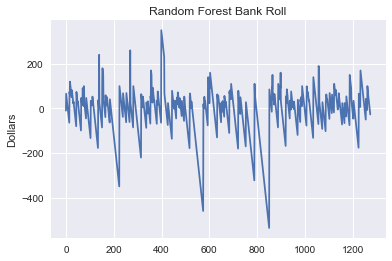

In [547]:
# Plotting winnings
plt.plot(winningsTracker)
plt.title('Random Forest Bank Roll')
plt.ylabel('Dollars')
plt.show()